In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
train_categorical = pd.read_excel("/content/TRAIN_CATEGORICAL_METADATA.xlsx")
train_solutions = pd.read_excel("/content/TRAINING_SOLUTIONS.xlsx")

## Exploratory Data Analysis

In [ ]:
train_categorical.head(10)

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
5,tBGXkEdv2cp7,2018,1,0.0,8,3,21,0,18,45
6,DgRP31gu21O9,2018,3,0.0,0,3,18,25,15,35
7,ClMA0FwvFgLY,2019,1,0.0,0,2,21,40,18,40
8,NVUkahaJ6fhf,2015,1,0.0,0,1,21,40,18,35
9,u0JiZgdGuYvh,2019,3,0.0,3,3,15,25,15,10


In [ ]:
train_categorical.shape

(1213, 10)

In [ ]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [ ]:
for feature in train_categorical.drop(columns = ['participant_id']).columns:
  print(train_categorical[feature].value_counts())
  print("\n")

Basic_Demos_Enroll_Year
2018    415
2019    312
2017    254
2016    191
2015     36
2020      5
Name: count, dtype: int64


Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64


PreInt_Demos_Fam_Child_Ethnicity
0.0    809
1.0    296
2.0     77
3.0     20
Name: count, dtype: int64


PreInt_Demos_Fam_Child_Race
0     627
8     195
1     181
2     128
3      30
9      23
10     11
4      10
11      6
7       2
Name: count, dtype: int64


MRI_Track_Scan_Location
2    532
3    463
1    179
4     36
0      3
Name: count, dtype: int64


Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
0      15
6      15
3       5
Name: count, dtype: int64


Barratt_Barratt_P1_Occ
0     317
35    219
45    187
40    154
30    154
25     79
15     35
20     31
5      31
10      6
Name: count, dtype: int64


Barratt_Barratt_P2_Edu
21    323
18    301
0     198
15    166
12    162
9      44
6      14
3       5
Name: count, dtype: int64


Barratt_Barratt_P2

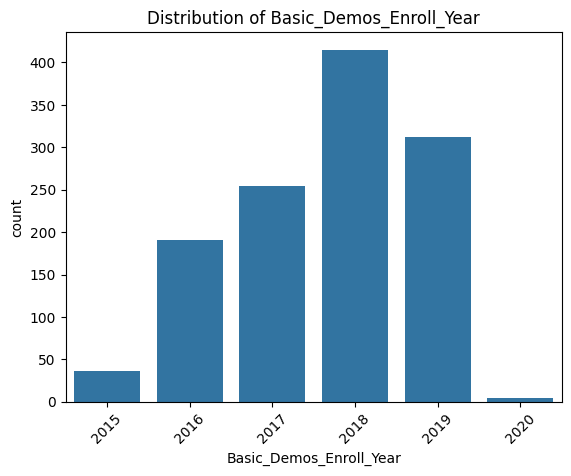

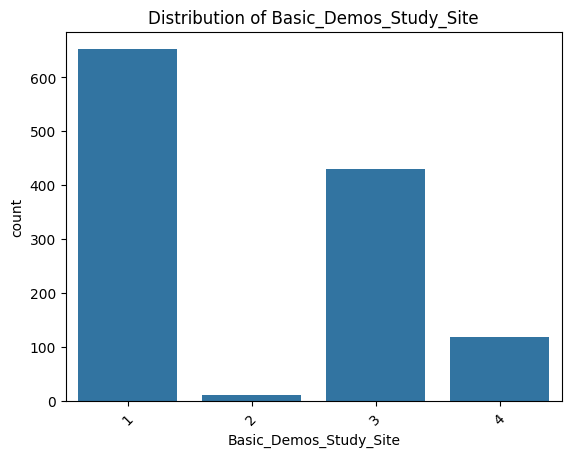

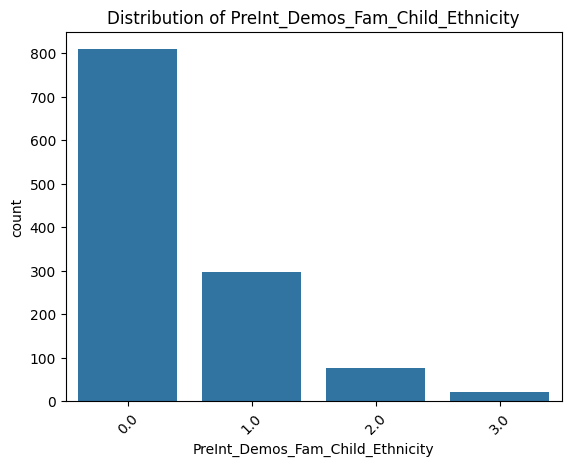

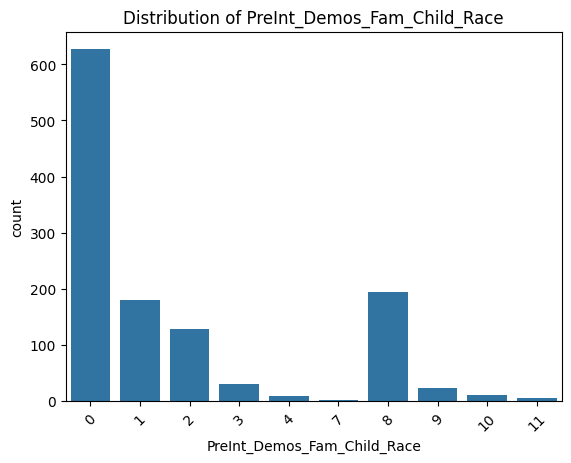

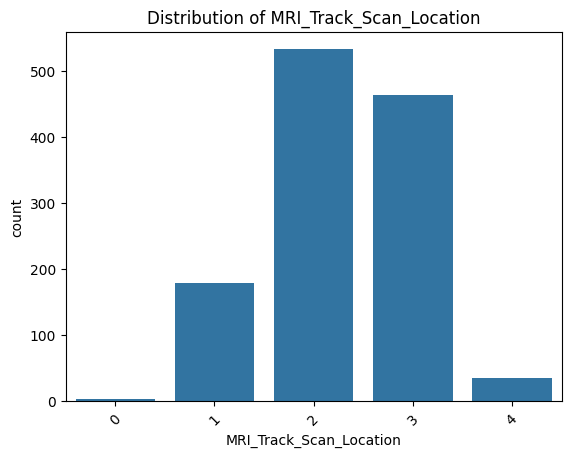

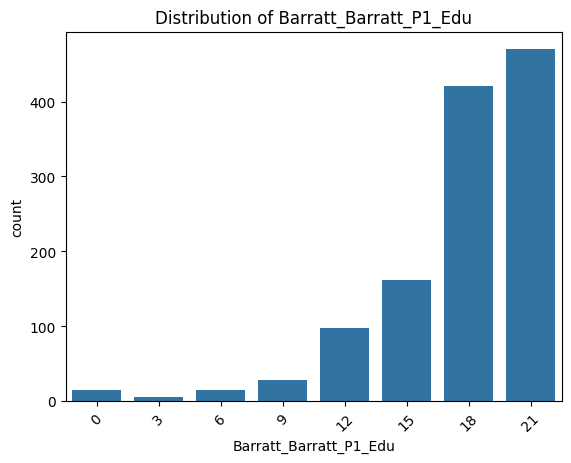

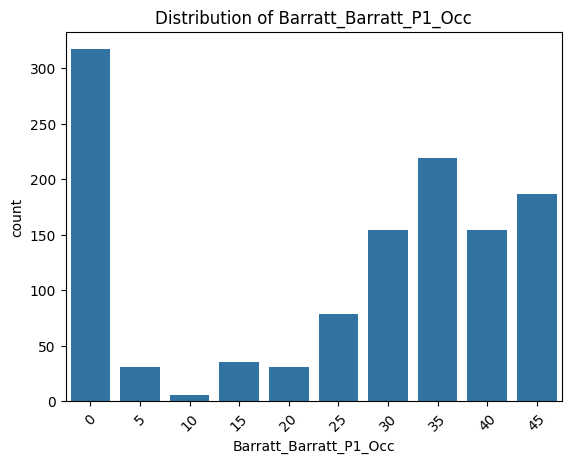

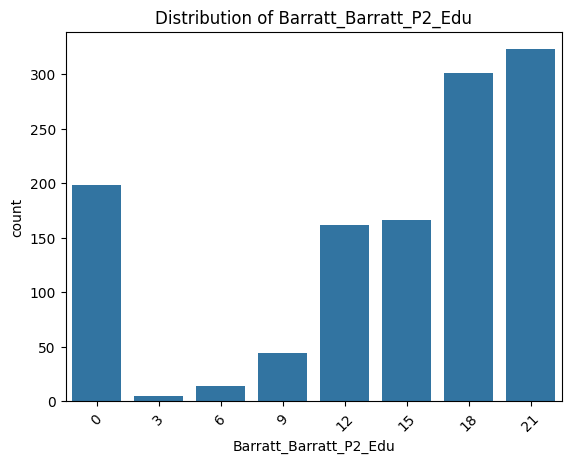

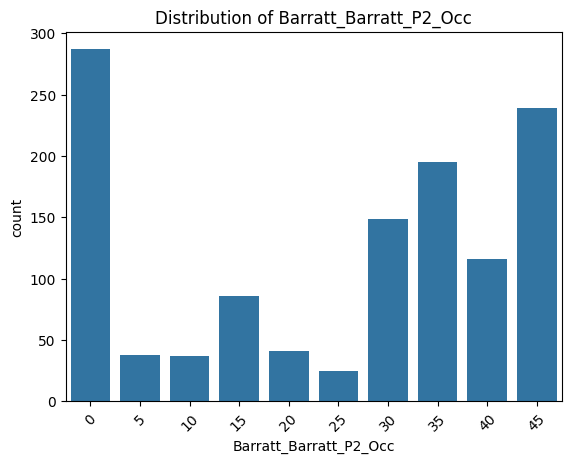

In [ ]:
#from workshop
for feature in train_categorical.drop(columns = ['participant_id']).columns:
  sns.countplot(x=feature, data=train_categorical[[feature]])
  plt.title(f"Distribution of " + feature)
  plt.xticks(rotation=45)
  plt.show()

# Data Dictionary

## Demographics
| Variable                          | Description                        | Type            | Values |
|-----------------------------------|------------------------------------|----------------|---------|
| Basic_Demos_Enroll_Year           | Year of enrollment                | int            | -       |
| Basic_Demos_Study_Site            | Site of phenotypic testing        | categorical int | 1 = Staten Island, 2 = MRV, 3 = Midtown, 4 = Harlem, 5 = SI RUMC |

## Pre-Interview - Demographics/Family
| Variable                          | Description                        | Type            | Values |
|-----------------------------------|------------------------------------|----------------|---------|
| PreInt_Demos_Fam_Child_Ethnicity  | Ethnicity of child                | categorical int | 0 = Not Hispanic or Latino, 1 = Hispanic or Latino, 2 = Decline to specify, 3 = Unknown |
| PreInt_Demos_Fam_Child_Race       | Race of child                     | categorical int | 0 = White/Caucasian, 1 = Black/African American, 2 = Hispanic, 3 = Asian, 4 = Indian, 5 = Native American Indian, 6 = American Indian/Alaskan Native, 7 = Native Hawaiian/Other Pacific Islander, 8 = Two or more races, 9 = Other race, 10 = Unknown, 11 = Choose not to specify |

## MRI Information
| Variable                          | Description                        | Type            | Values |
|-----------------------------------|------------------------------------|----------------|---------|
| MRI_Track_Scan_Location           | Scan location                     | categorical int | 1 = Staten Island, 2 = RUBIC, 3 = CBIC, 4 = CUNY |

## Barratt Simplified Measure of Social Status
### Parent 1
| Variable                          | Description                        | Type            | Values |
|-----------------------------------|------------------------------------|----------------|---------|
| Barratt_Barratt_P1_Edu            | Parent 1 level of education       | categorical int | 3 = Less than 7th grade, 6 = Junior high/Middle school (9th grade), 9 = Partial high school (10th or 11th grade), 12 = High school graduate, 15 = Partial college (at least one year), 18 = College education, 21 = Graduate degree |
| Barratt_Barratt_P1_Occ            | Parent 1 occupation               | categorical int | 0 = Homemaker, 5 = Day laborer, janitor, 10 = Garbage collector, 15 = Painter, 20 = Automobile mechanic, 25 = Machinist, 30 = Supervisor, 35 = Nurse, 40 = Engineer/Administrator/Teacher, 45 = Physician/Attorney/Professor |

### Parent 2
| Variable                          | Description                        | Type            | Values |
|-----------------------------------|------------------------------------|----------------|---------|
| Barratt_Barratt_P2_Edu            | Parent 2 level of education       | categorical int | Same as Parent 1 education |
| Barratt_Barratt_P2_Occ            | Parent 2 occupation               | categorical int | Same as Parent 1 occupation |

## More Exploratory Data Analysis

In [ ]:
train_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


ADHD DISTRIBUTION EXPLORARTORY DATA ANALYSIS

In [ ]:
# ADHD distribution
train_solutions['ADHD_Outcome'].value_counts()

,count
ADHD_Outcome,
1,831
0,382


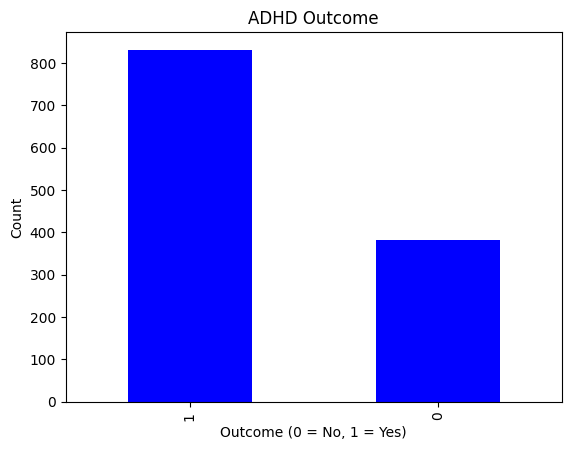

In [ ]:
train_solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

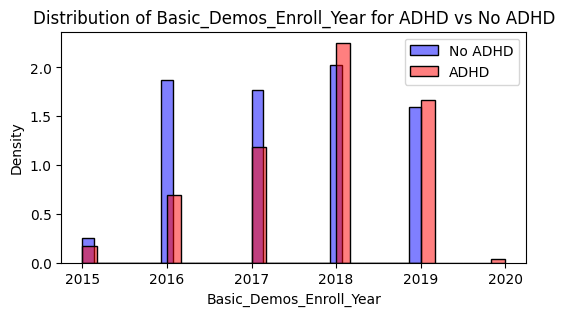

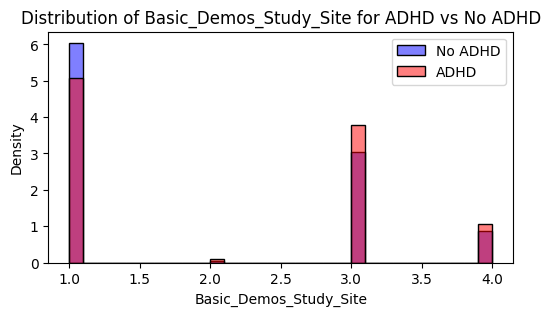

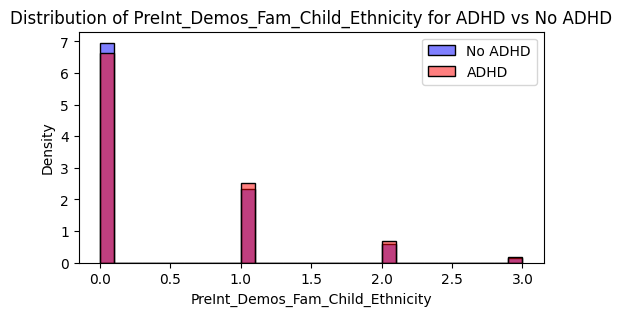

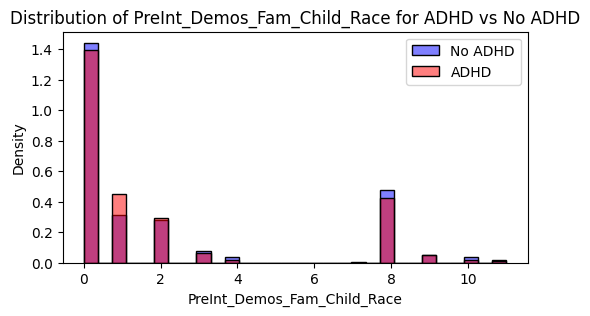

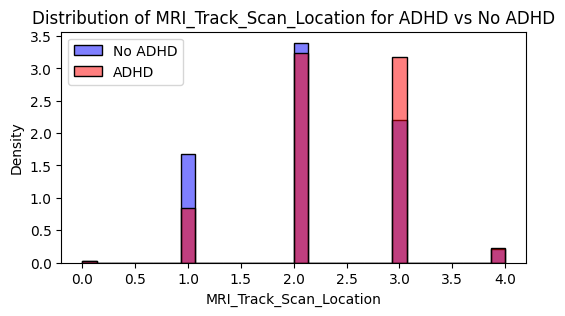

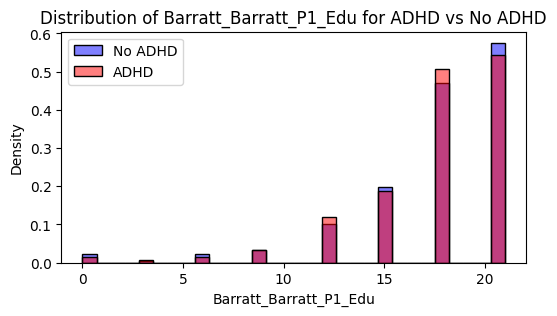

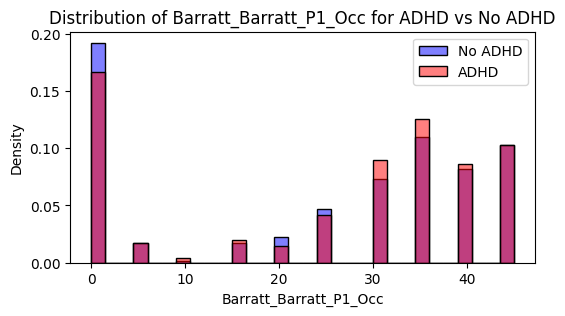

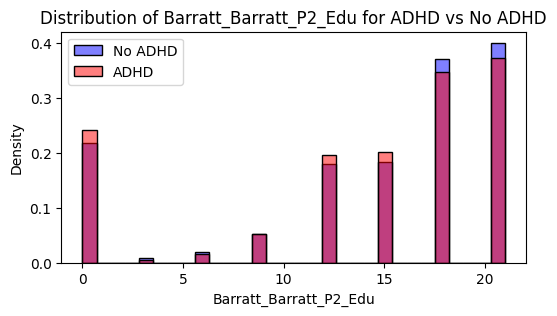

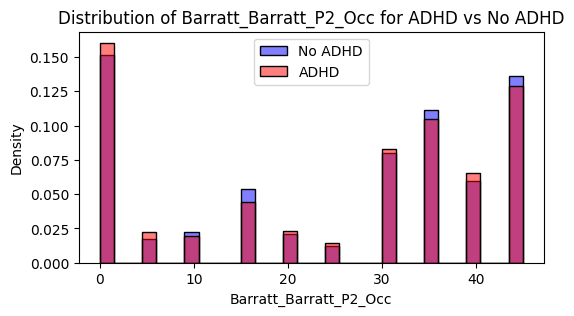

In [ ]:
#Histograms of ADHD and no ADHD organized by categorical variable
train_cat_copy = train_categorical.copy()
train_cat_copy['ADHD_Outcome'] = train_solutions['ADHD_Outcome']

for feature in train_categorical.drop(columns = ['participant_id']).columns:
    plt.figure(figsize=(6, 3))

    sns.histplot(train_cat_copy[train_cat_copy['ADHD_Outcome'] == 0][feature], color='blue', label='No ADHD', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(train_cat_copy[train_cat_copy['ADHD_Outcome'] == 1][feature], color='red', label='ADHD', kde=False, stat="density", bins=30, alpha=0.5)

    plt.title(f'Distribution of {feature} for ADHD vs No ADHD')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

    plt.show()

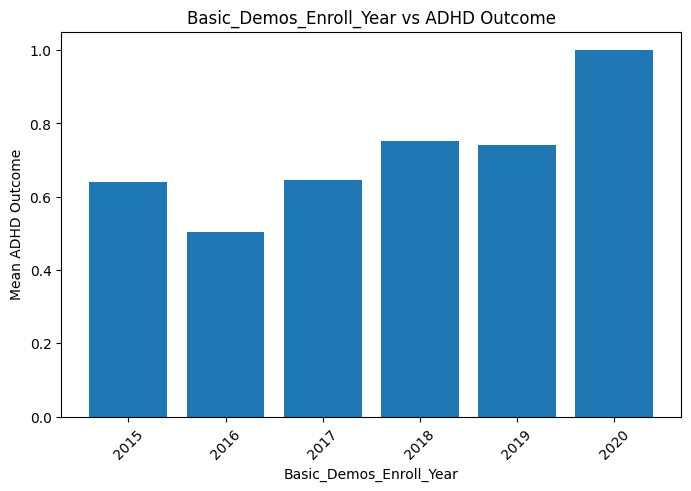

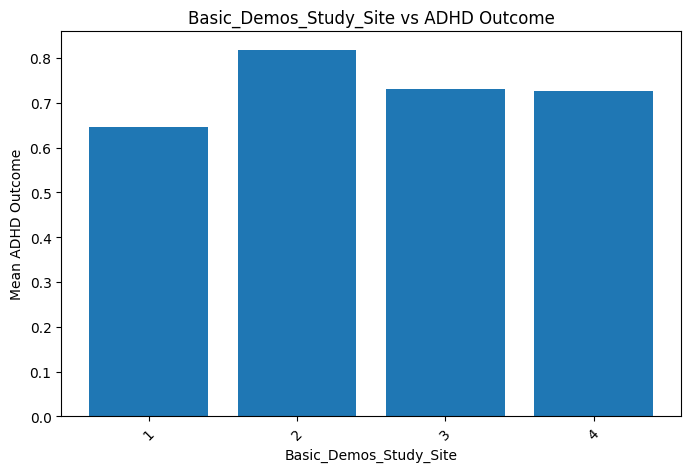

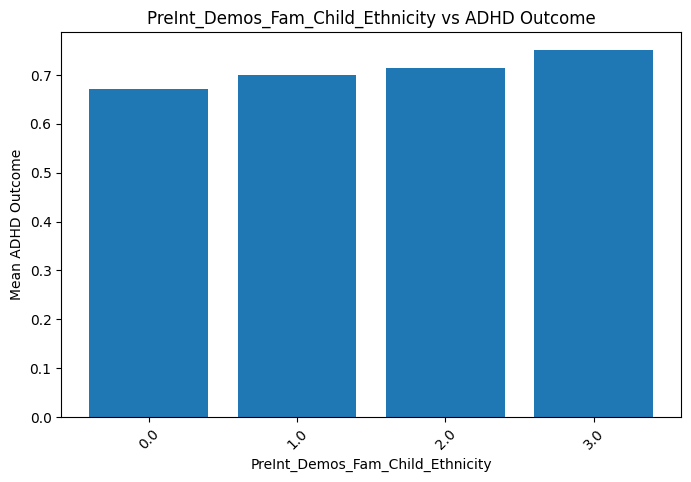

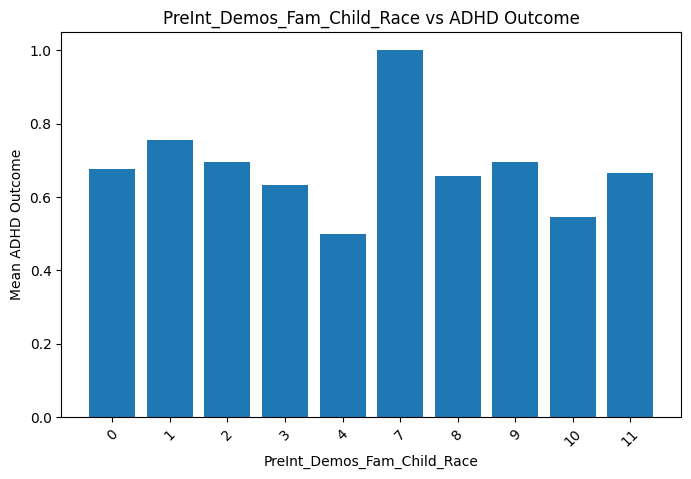

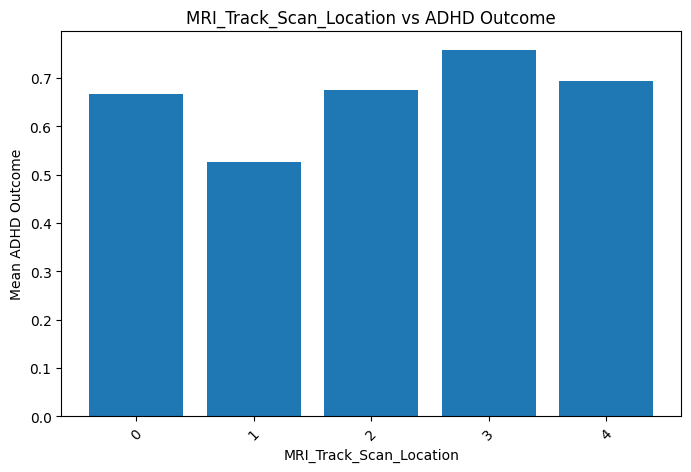

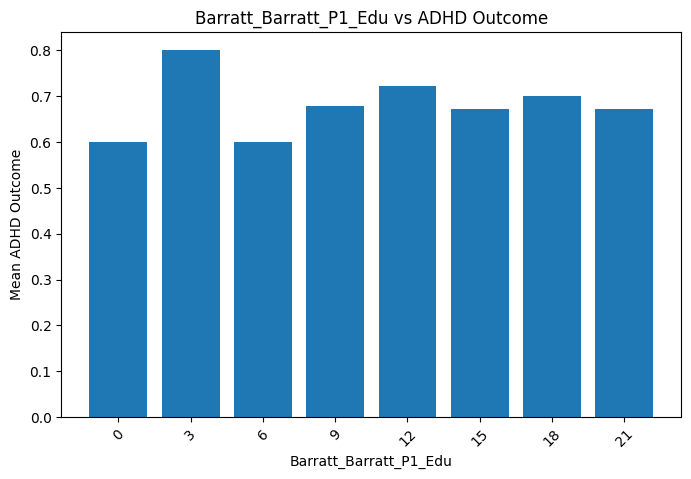

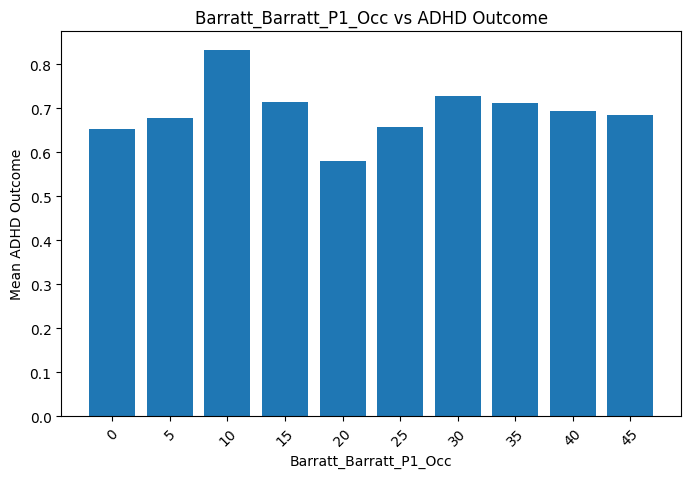

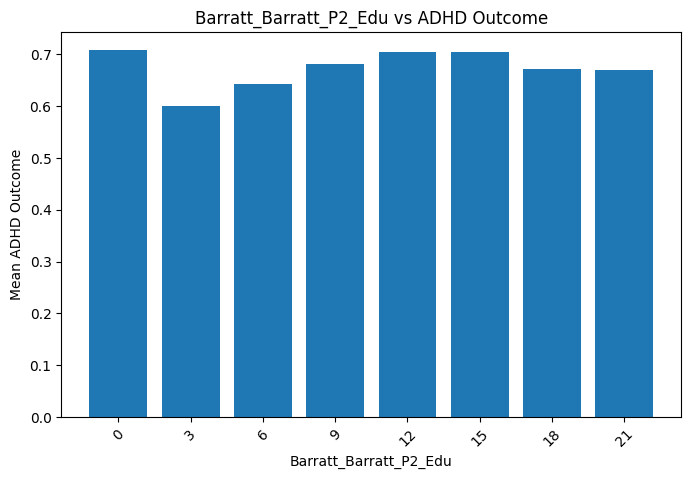

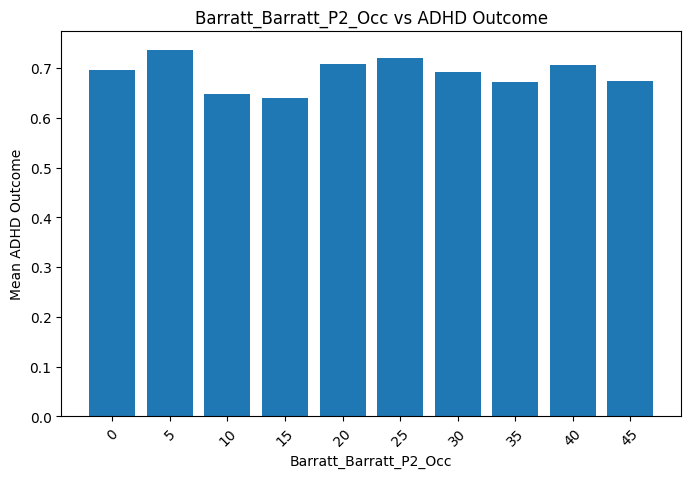

In [ ]:
#Bar plot for mean ADHD Outcomes for each categorical variable
for feature in train_categorical.drop(columns=['participant_id']).columns:
    #Group by the categorical feature and compute the mean ADHD outcome
    grouped = train_solutions.groupby(train_categorical[feature])['ADHD_Outcome'].mean()

    plt.figure(figsize=(8, 5))
    plt.bar(grouped.index.astype(str), grouped.values)  #Convert index to string for categorical labels
    plt.title(f"{feature} vs ADHD Outcome")
    plt.xlabel(feature)
    plt.ylabel("Mean ADHD Outcome")
    plt.xticks(rotation=45)
    plt.show()

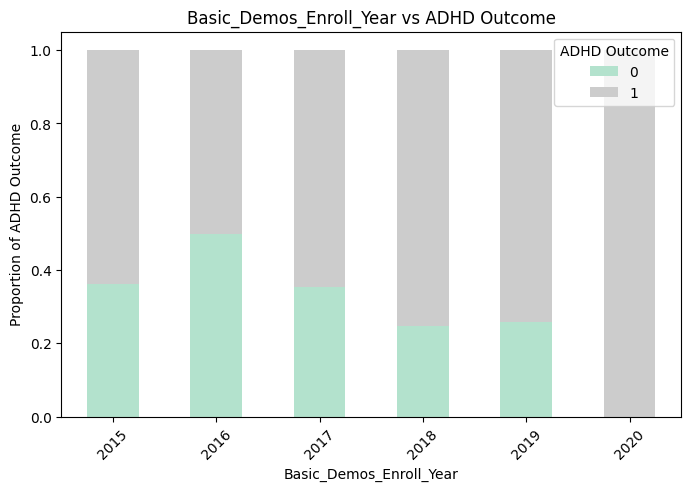

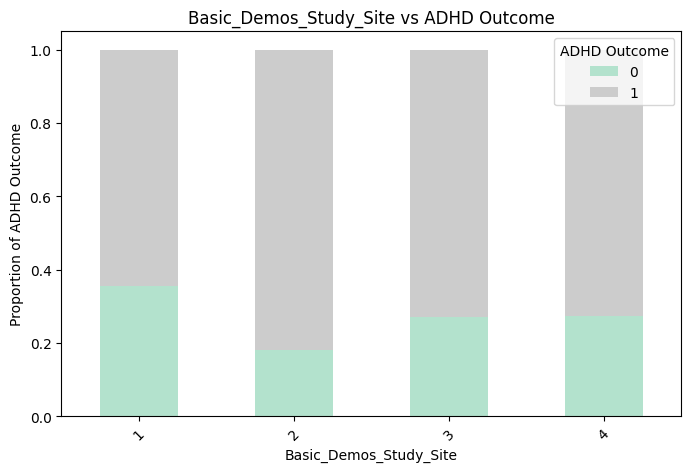

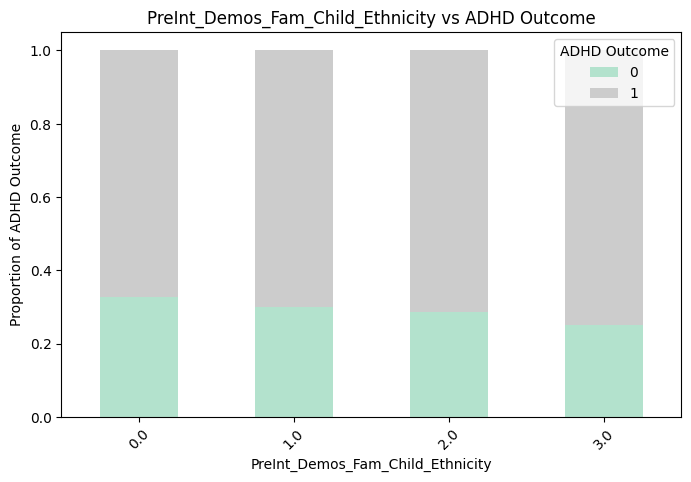

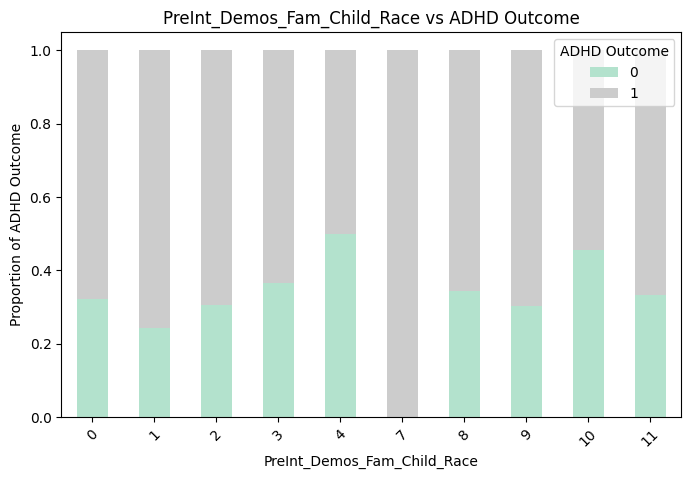

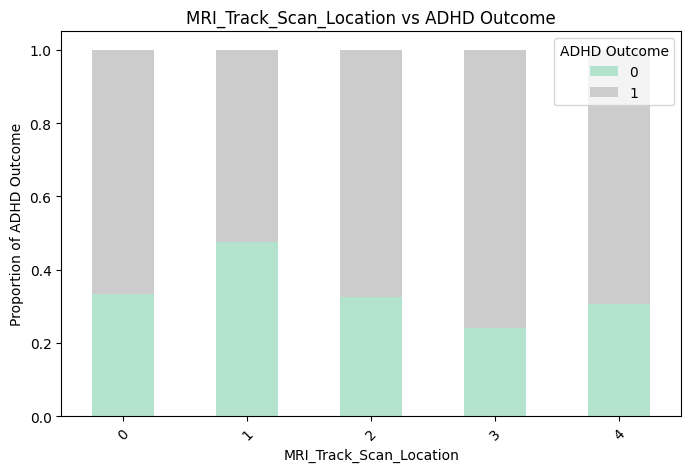

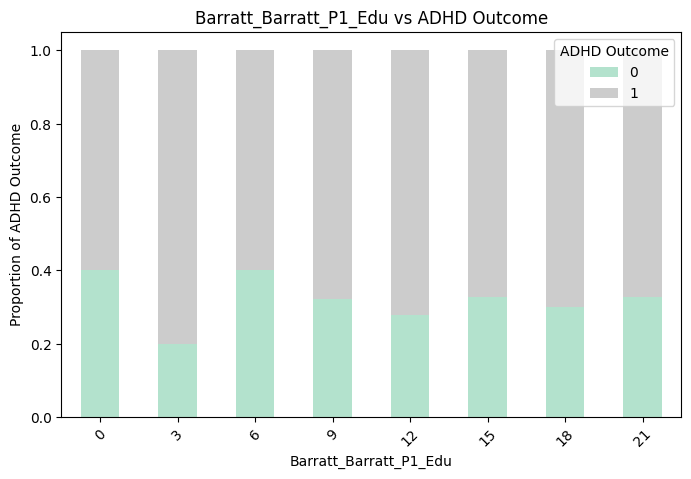

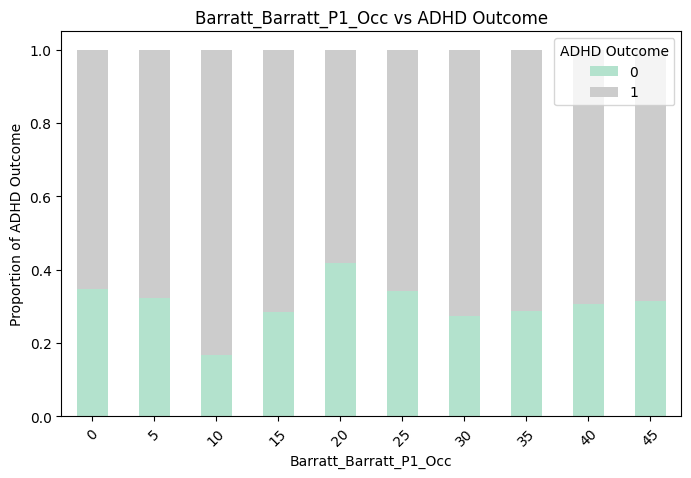

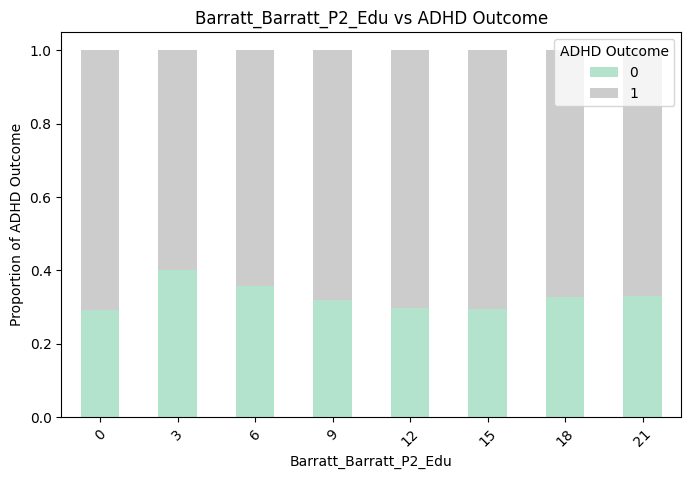

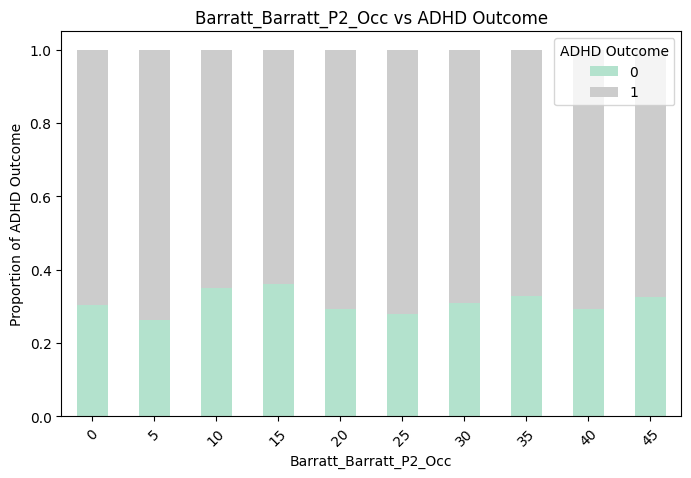

In [ ]:
#Crosstab Plots for ADHD and categorical variables
for feature in train_categorical.drop(columns=['participant_id']).columns:
    # Create a crosstab to count ADHD outcomes per category
    crosstab_result = pd.crosstab(train_categorical[feature], train_solutions['ADHD_Outcome'], normalize='index')

    # Plot the ADHD rate per category
    crosstab_result.plot(kind='bar', figsize=(8, 5), stacked=True, colormap="Pastel2")

    plt.title(f"{feature} vs ADHD Outcome")
    plt.xlabel(feature)
    plt.ylabel("Proportion of ADHD Outcome")
    plt.xticks(rotation=45)
    plt.legend(title="ADHD Outcome")
    plt.show()

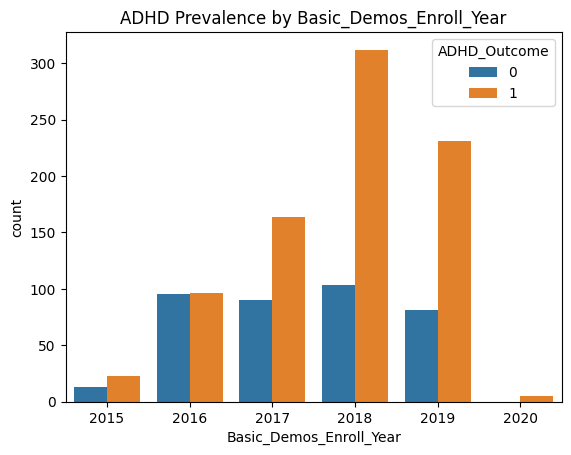

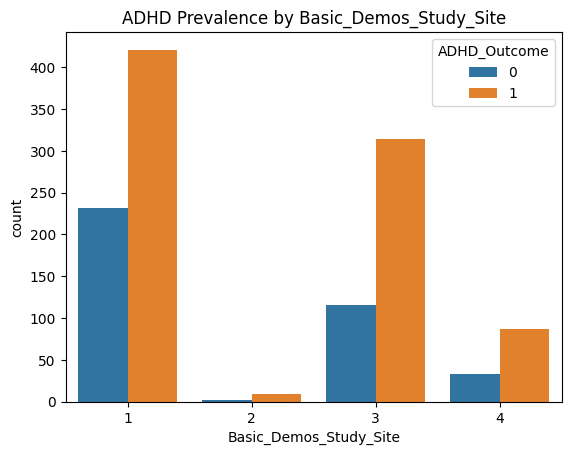

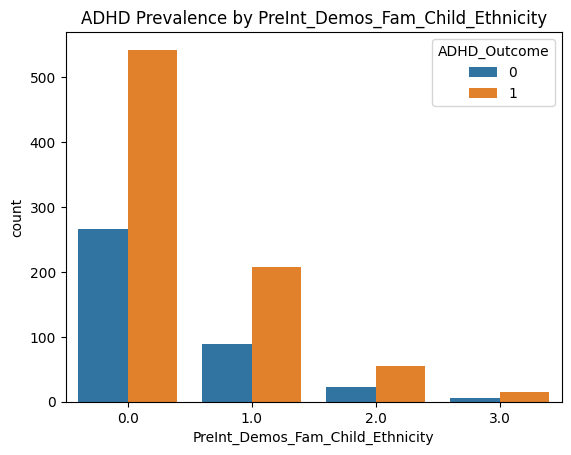

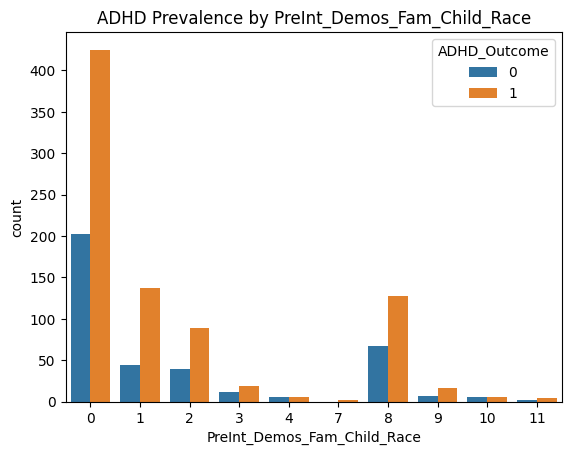

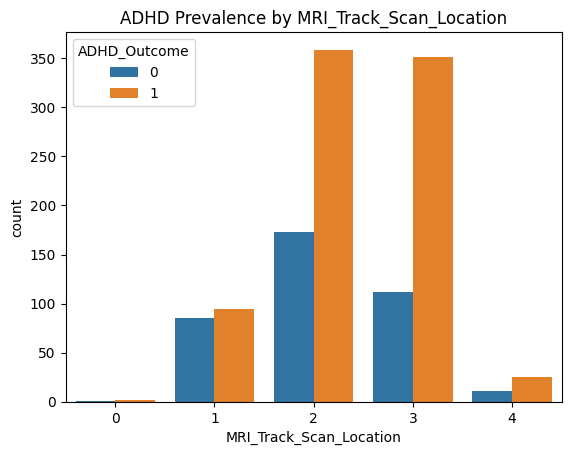

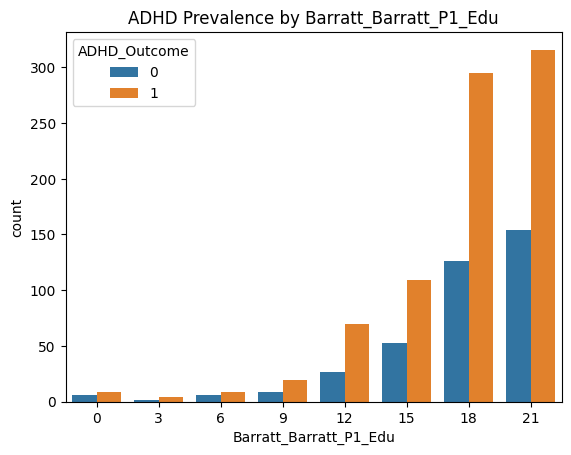

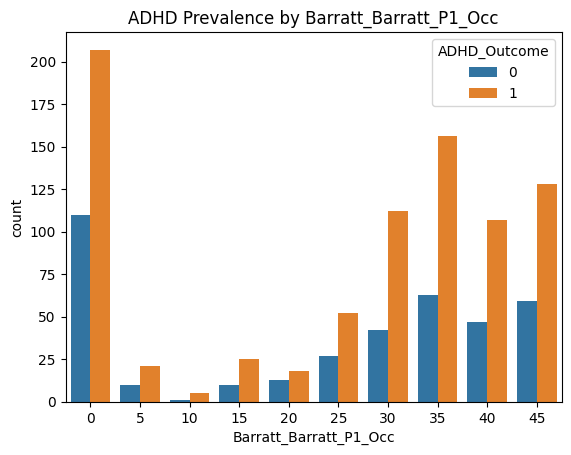

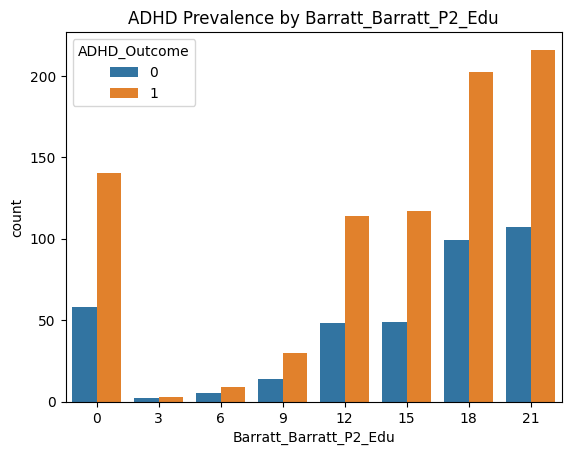

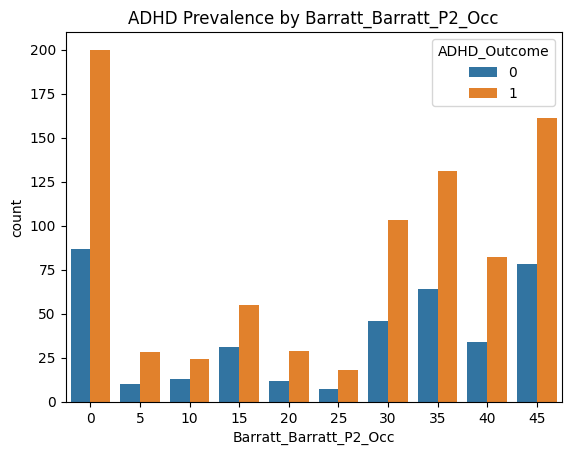

In [ ]:
#From workshop
import seaborn as sns
import matplotlib.pyplot as plt

for feature in train_categorical.drop(columns=['participant_id']).columns:
  sns.countplot(data=train_categorical, x=feature, hue=train_solutions['ADHD_Outcome'])
  plt.title('ADHD Prevalence by ' + feature)
  plt.show()

GENDER DISTRIBUTION EXPLORARTORY DATA ANALYSIS

In [ ]:
# Gender distribution
train_solutions['Sex_F'].value_counts()

,count
Sex_F,
0,797
1,416


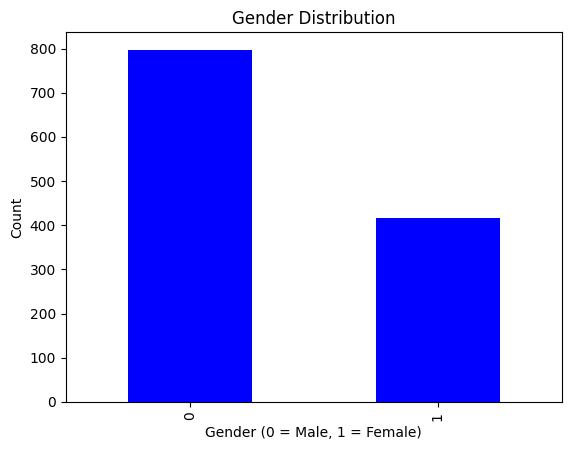

In [ ]:
train_solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

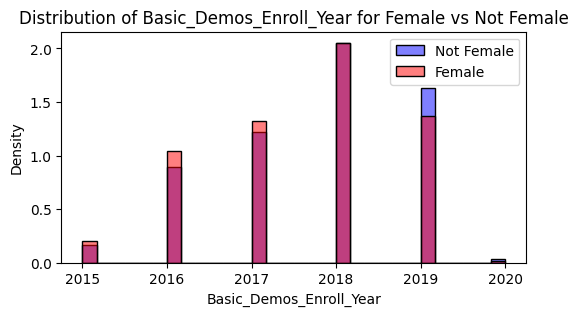

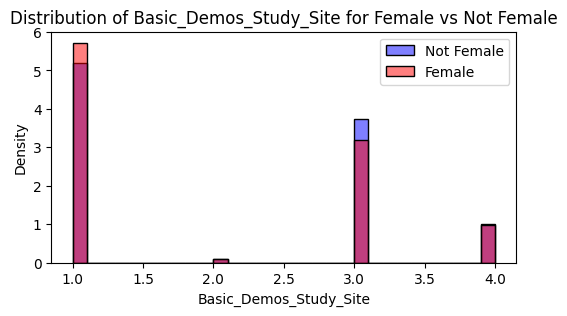

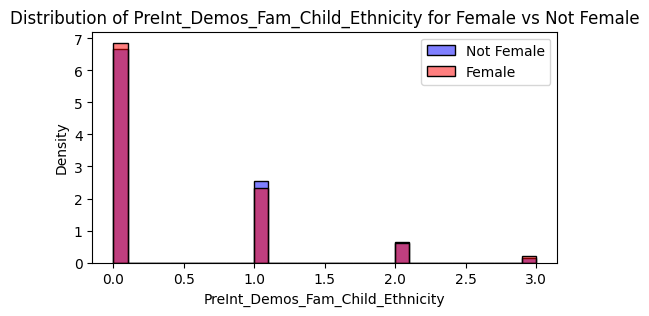

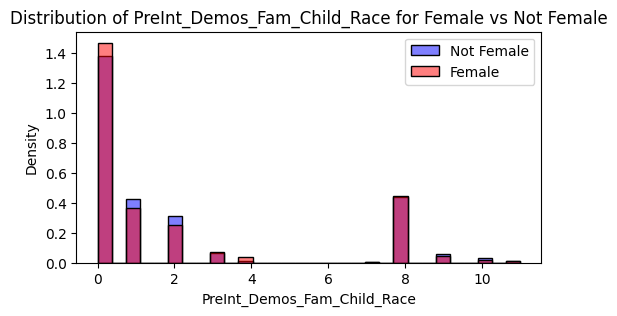

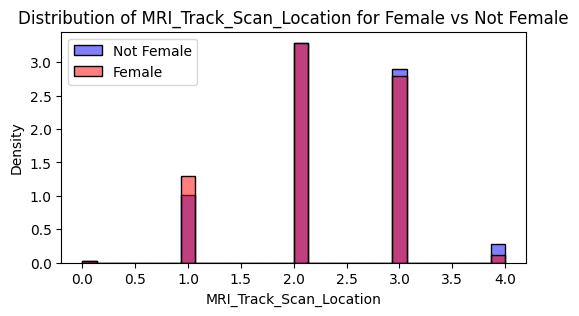

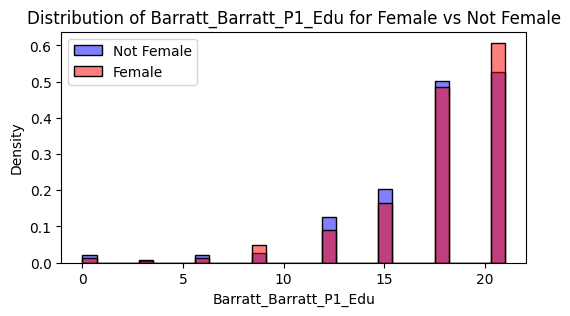

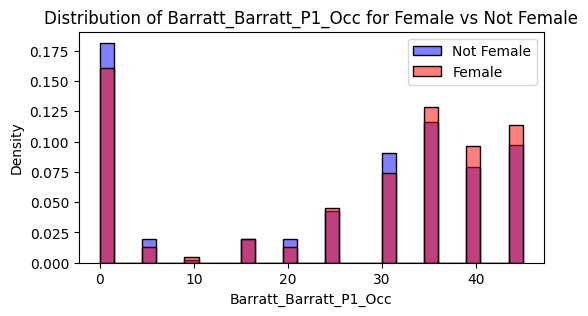

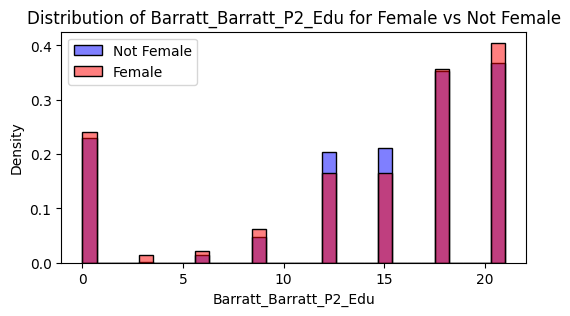

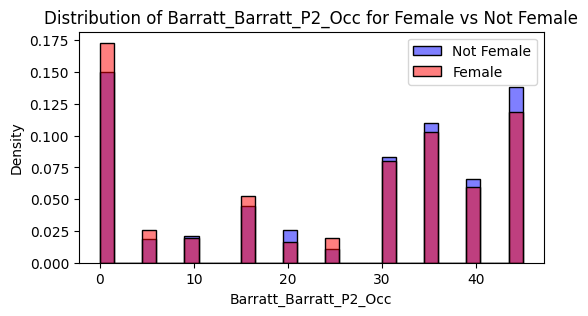

In [ ]:
#Histograms of female and not female organized by categorical variable
train_cat_copy = train_categorical.copy()
train_cat_copy['Sex_F'] = train_solutions['Sex_F']

for feature in train_categorical.drop(columns = ['participant_id']).columns:
    plt.figure(figsize=(6, 3))

    sns.histplot(train_cat_copy[train_cat_copy['Sex_F'] == 0][feature], color='blue', label='Not Female', kde=False, stat="density", bins=30, alpha=0.5)
    sns.histplot(train_cat_copy[train_cat_copy['Sex_F'] == 1][feature], color='red', label='Female', kde=False, stat="density", bins=30, alpha=0.5)

    plt.title(f'Distribution of {feature} for Female vs Not Female')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

    plt.show()

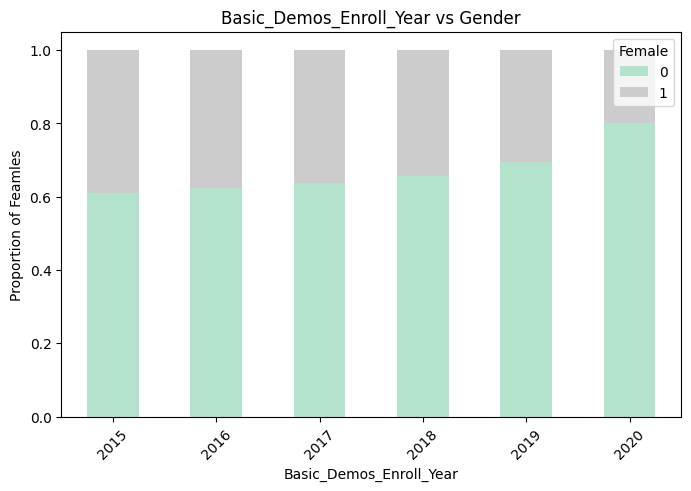

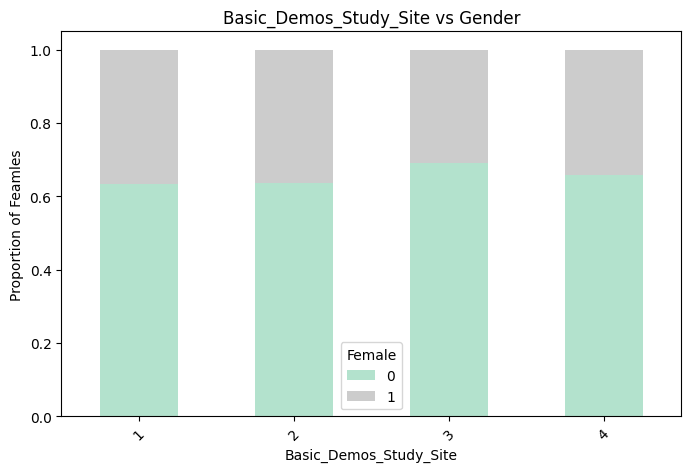

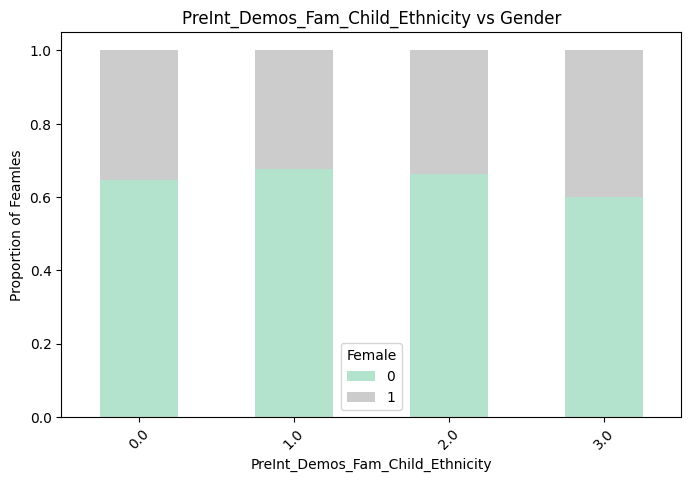

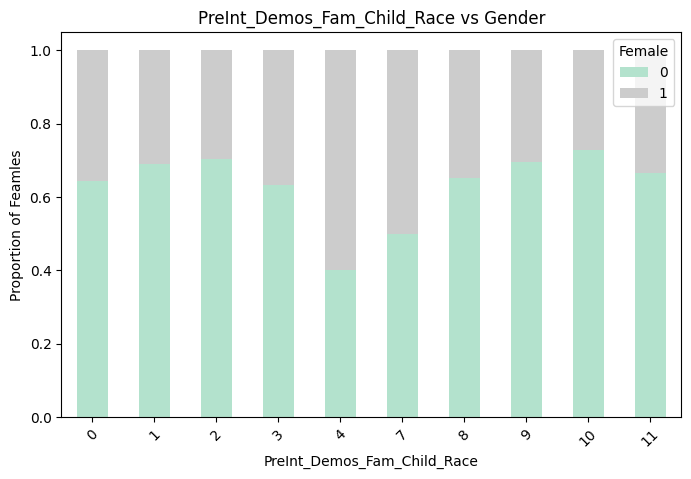

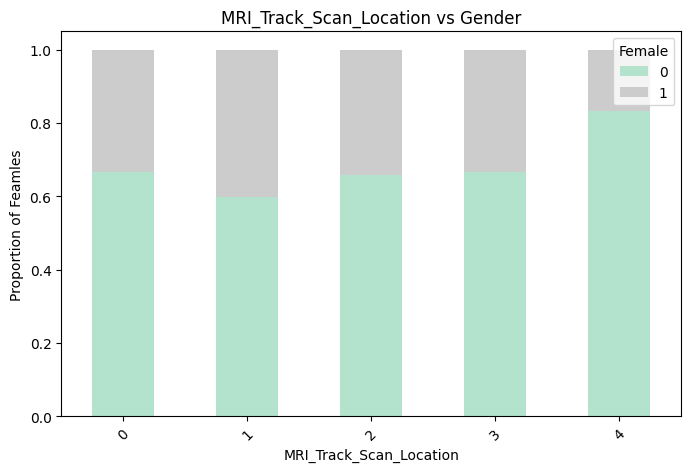

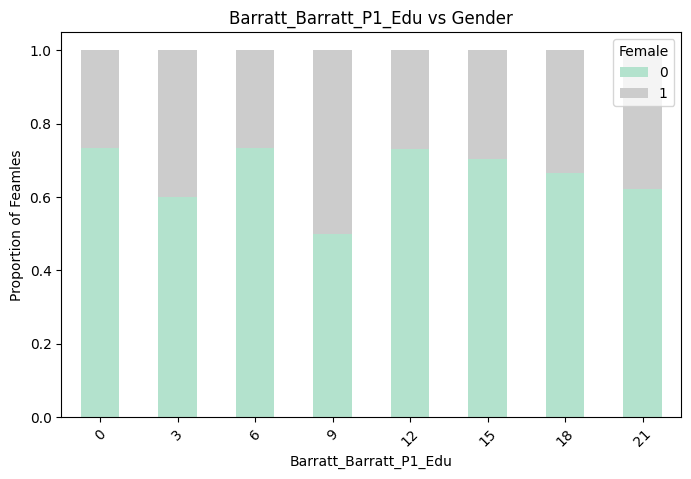

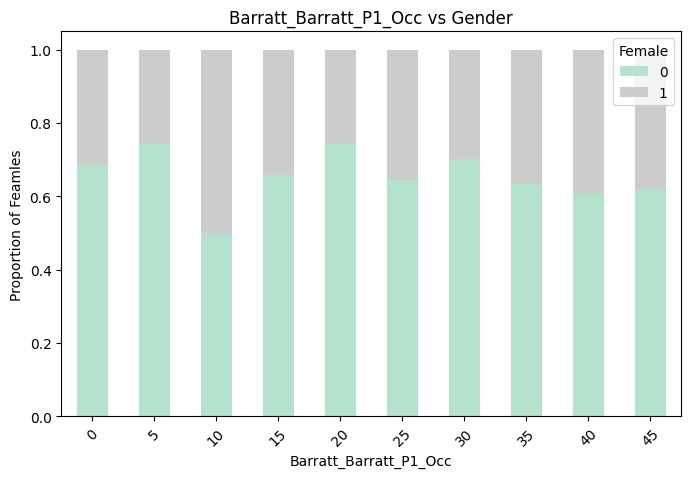

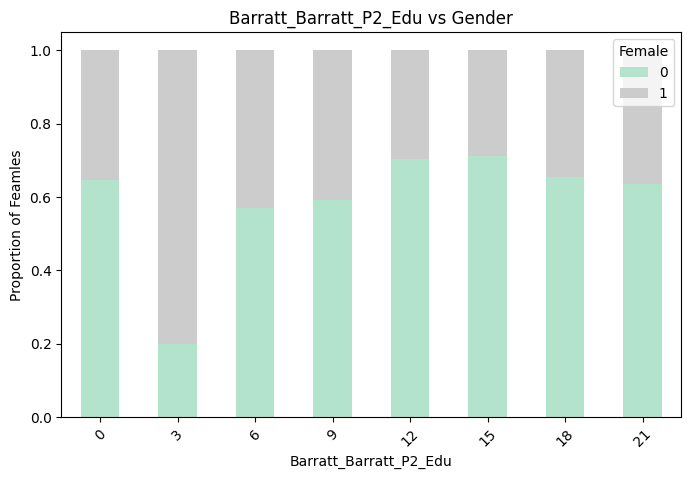

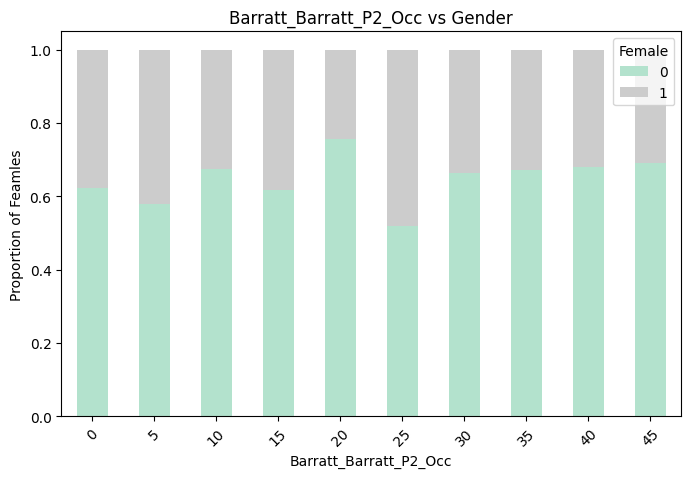

In [ ]:
#Crosstab Plots for gender and categorical variables
for feature in train_categorical.drop(columns=['participant_id']).columns:
    # Create a crosstab to count females per category
    crosstab_result = pd.crosstab(train_categorical[feature], train_solutions['Sex_F'], normalize='index')

    # Plot the female rate per category
    crosstab_result.plot(kind='bar', figsize=(8, 5), stacked=True, colormap="Pastel2")

    plt.title(f"{feature} vs Gender")
    plt.xlabel(feature)
    plt.ylabel("Proportion of Feamles")
    plt.xticks(rotation=45)
    plt.legend(title="Female")
    plt.show()

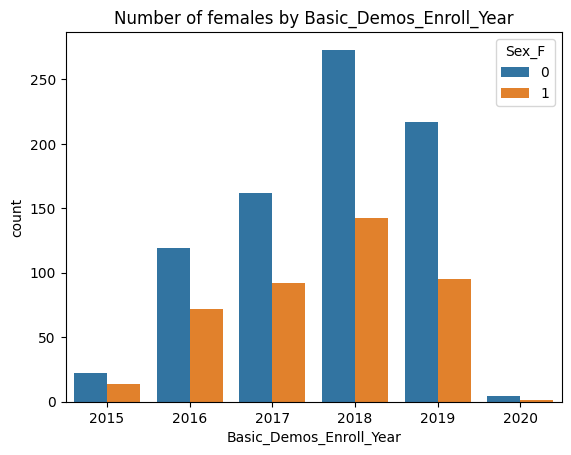

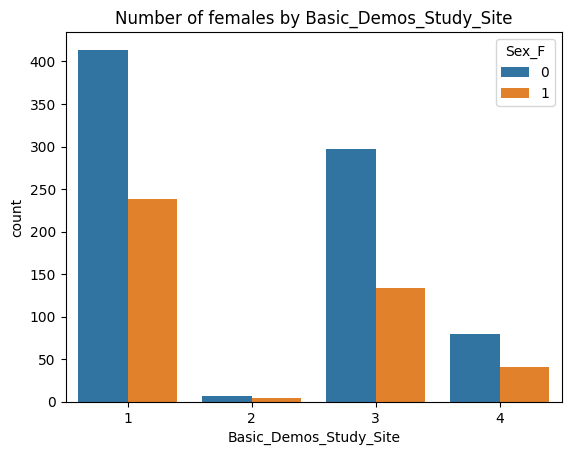

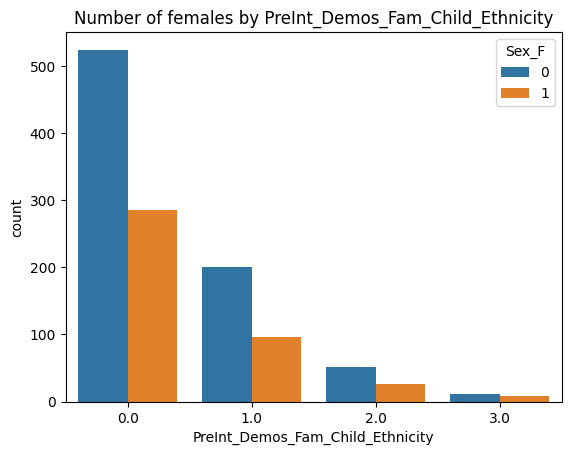

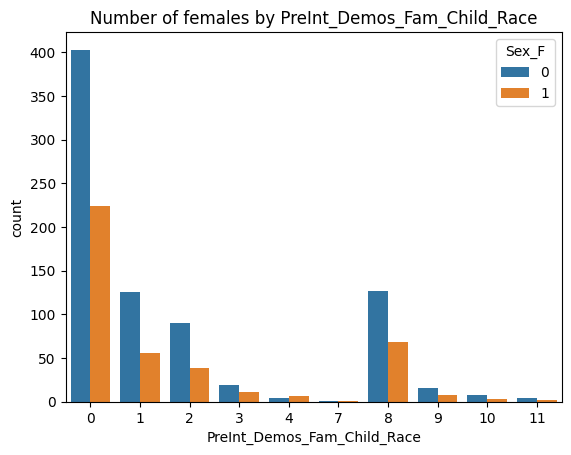

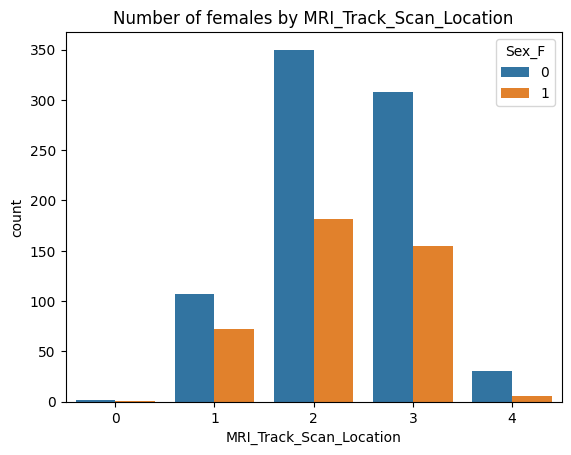

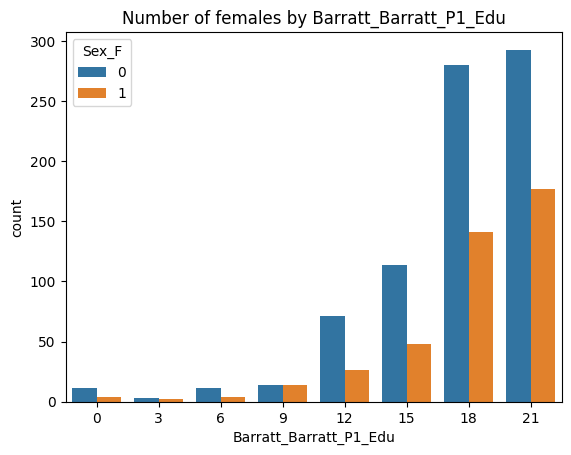

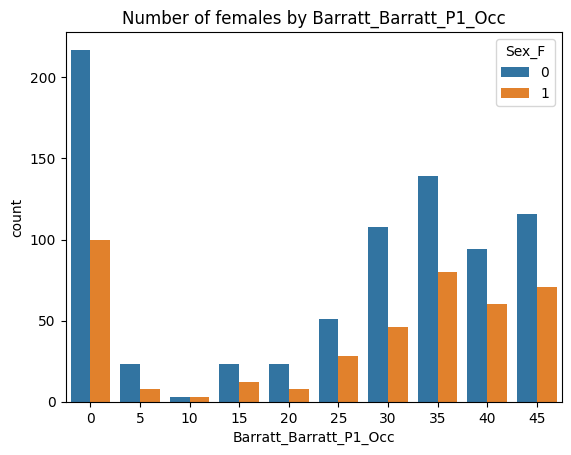

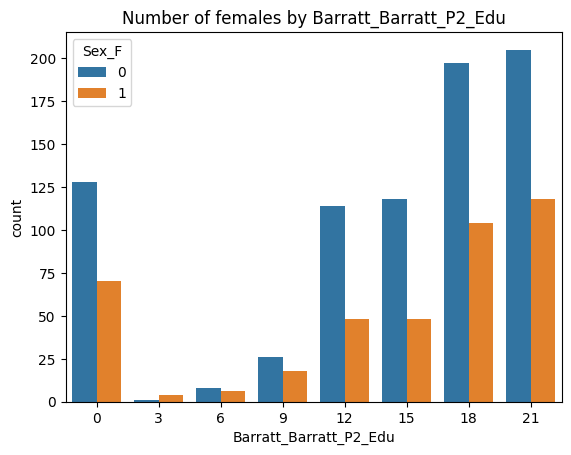

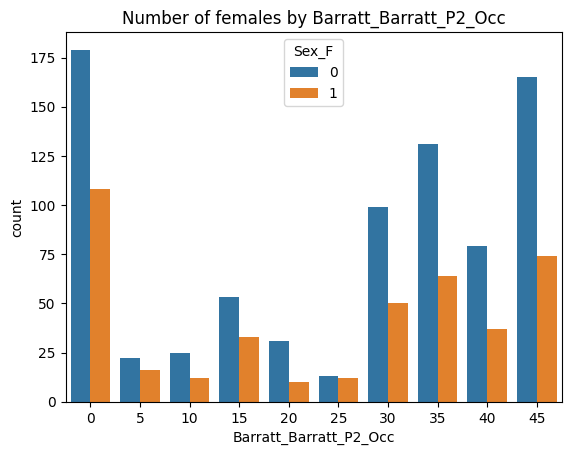

In [ ]:
#From workshop
import seaborn as sns
import matplotlib.pyplot as plt

for feature in train_categorical.drop(columns=['participant_id']).columns:
  sns.countplot(data=train_categorical, x=feature, hue=train_solutions['Sex_F'])
  plt.title('Number of females by ' + feature)
  plt.show()

Solutions to Address Gender Imbalance

#Oversampling -> Adding Synthetic Females

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
print(train_categorical.shape, train_solutions.shape)

(1213, 10) (1213, 3)


In [ ]:
df = pd.merge(train_categorical, train_solutions, on='participant_id')

participant_ids = df['participant_id']

In [ ]:
df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [ ]:
print(df.isna().sum())

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
ADHD_Outcome                         0
Sex_F                                0
dtype: int64


In [ ]:
#fill missing NA values
df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

In [ ]:
X = df.drop(columns=['Sex_F', 'participant_id'])
y = df['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
print(y_train_resampled.value_counts())

Sex_F
0    626
1    626
Name: count, dtype: int64


## Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Decision Tree

**Sex_F Prediction**

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_resampled, dt_classifier.predict(X_train_resampled))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6091
Decision Tree Training Accuracy: 0.7093

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       171
           1       0.39      0.56      0.46        72

    accuracy                           0.61       243
   macro avg       0.58      0.59      0.58       243
weighted avg       0.66      0.61      0.62       243



**ADHD prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']


# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train_ADHD, y_train_ADHD)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test_ADHD)

# Evaluate the model
accuracy = accuracy_score(y_test_ADHD, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_ADHD, dt_classifier.predict(X_train_ADHD))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test_ADHD, y_pred))

Decision Tree Accuracy: 0.6790
Decision Tree Training Accuracy: 0.6573

              precision    recall  f1-score   support

           0       0.31      0.17      0.22        65
           1       0.74      0.87      0.80       178

    accuracy                           0.68       243
   macro avg       0.53      0.52      0.51       243
weighted avg       0.63      0.68      0.64       243



### Gradient Boosting Decision Trees

**Sex_F prediction**

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Validation accuracy: 0.6213991769547325


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       171
           1       0.39      0.49      0.43        72

    accuracy                           0.62       243
   macro avg       0.57      0.58      0.57       243
weighted avg       0.65      0.62      0.63       243



**ADHD prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_ADHD, y_train_ADHD)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ADHD)
print(f"Validation accuracy: {accuracy_score(y_test_ADHD, y_pred)}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation accuracy: 0.6378600823045267

              precision    recall  f1-score   support

           0       0.27      0.22      0.24        65
           1       0.73      0.79      0.76       178

    accuracy                           0.64       243
   macro avg       0.50      0.50      0.50       243
weighted avg       0.61      0.64      0.62       243



###Doing GBD for One-Hot Encoded Oversampling

In [ ]:
df = pd.read_csv("/content/cat_balanced_over.csv")

In [ ]:
X = df.drop(columns=['Sex_F_1', 'participant_id'])
y = df['Sex_F_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_ADHD = X_train.drop(columns=['ADHD_Outcome_1'])
y_train_ADHD = X_train['ADHD_Outcome_1']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome_1'])
y_test_ADHD = X_test['ADHD_Outcome_1']

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_ADHD, y_train_ADHD)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ADHD)
print(f"Validation accuracy: {accuracy_score(y_test_ADHD, y_pred)}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.6520376175548589


###Logistic Regression

In [ ]:
cat_balanced = pd.read_csv('cat_balanced_over.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [ ]:
cat_balanced.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Occ_38,Barratt_Barratt_P2_Occ_39,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_41,Barratt_Barratt_P2_Occ_42,Barratt_Barratt_P2_Occ_43,Barratt_Barratt_P2_Occ_44,Barratt_Barratt_P2_Occ_45,ADHD_Outcome_1,Sex_F_1
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(cat_balanced.drop(columns='participant_id'), cat_balanced['Sex_F_1'])

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.Series(model.coef_[0], index=cat_balanced.drop(columns='participant_id').columns)

In [ ]:
top_features = coefficients.abs().nlargest(10)
print(top_features)

Sex_F_1                         8.790301
ADHD_Outcome_1                  0.383983
Basic_Demos_Study_Site_2        0.323462
Barratt_Barratt_P1_Edu_12       0.216707
MRI_Track_Scan_Location_4       0.196089
Barratt_Barratt_P1_Edu_15       0.191826
Barratt_Barratt_P1_Edu_19       0.182693
Basic_Demos_Enroll_Year_2019    0.181552
Barratt_Barratt_P2_Occ_45       0.172621
Barratt_Barratt_P2_Edu_15       0.167829
dtype: float64


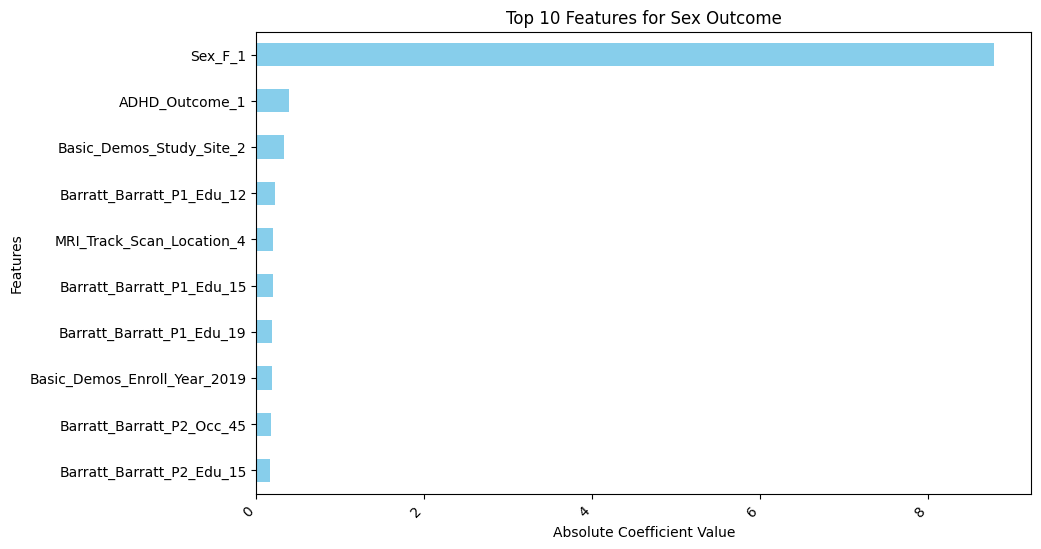

In [ ]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(cat_balanced.drop(columns='participant_id'), cat_balanced['ADHD_Outcome_1'])

LogisticRegression(max_iter=1000)

In [ ]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=cat_balanced.drop(columns='participant_id').columns)

In [ ]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

ADHD_Outcome_1                   8.802806
Sex_F_1                          0.379301
Basic_Demos_Enroll_Year_2016     0.182618
MRI_Track_Scan_Location_1        0.144771
MRI_Track_Scan_Location_3        0.127160
PreInt_Demos_Fam_Child_Race_1    0.117266
Barratt_Barratt_P1_Edu_12        0.117029
Barratt_Barratt_P2_Occ_15        0.108283
Basic_Demos_Enroll_Year_2019     0.107559
Basic_Demos_Enroll_Year_2017     0.099747
dtype: float64


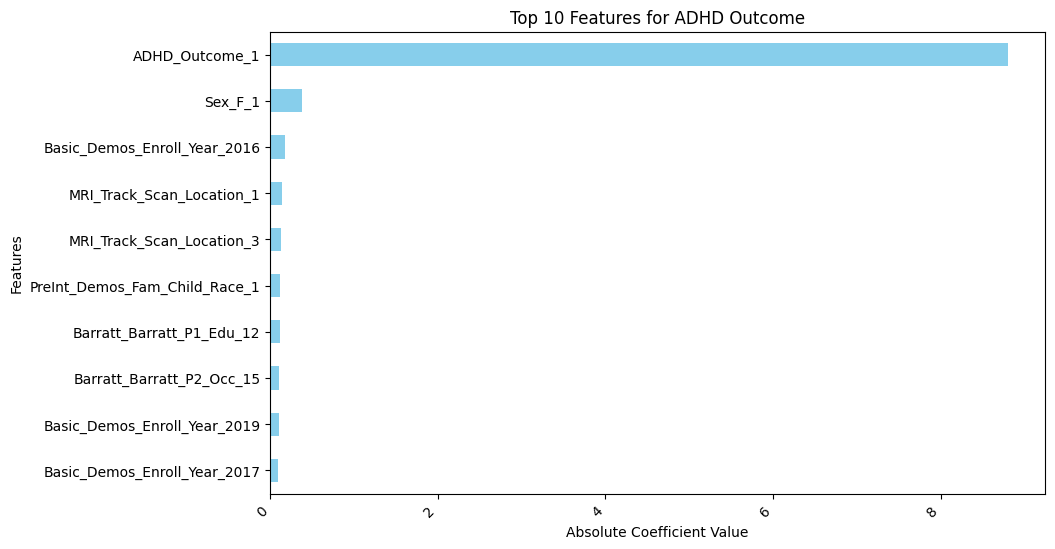

In [ ]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
y = cat_balanced['Sex_F_1']
X = cat_balanced.drop(columns=['Sex_F_1', 'participant_id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1067, 142)
(527, 142)


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LogisticRegression()

# 2. Fit the model to the training data below

model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.018243     0.981757
     0.166870     0.833130
     0.173472     0.826528
     0.620744     0.379256
     0.717716     0.282284
Log loss: 0.5941211171004704
Class labels: [1 1 1 0 0]
Accuracy: 0.6584440227703985


In [ ]:
y = cat_balanced['ADHD_Outcome_1']
X = cat_balanced.drop(columns=['ADHD_Outcome_1', 'participant_id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1067, 142)
(527, 142)


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LogisticRegression()

# 2. Fit the model to the training data below

model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.682952     0.317048
     0.621945     0.378055
     0.574092     0.425908
     0.439020     0.560980
     0.394373     0.605627
Log loss: 0.6392608752418221
Class labels: [0 0 0 1 1]
Accuracy: 0.6546489563567363


#Undersampling -> Removing Males

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
print(train_categorical.shape, train_solutions.shape)

(1213, 10) (1213, 3)


In [ ]:
df = pd.merge(train_categorical, train_solutions, on='participant_id')

participant_ids = df['participant_id']

In [ ]:
df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [ ]:
print(df.isna().sum())

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
ADHD_Outcome                         0
Sex_F                                0
dtype: int64


In [ ]:
#fill missing NA values
df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

In [ ]:
X = df.drop(columns=['Sex_F', 'participant_id'])
y = df['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [ ]:
print(y_train_resampled.value_counts())

Sex_F
0    344
1    344
Name: count, dtype: int64


## Models

### Decision Tree

**Sex_F prediction**

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_resampled, dt_classifier.predict(X_train_resampled))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6008
Decision Tree Training Accuracy: 0.6250

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       171
           1       0.34      0.38      0.36        72

    accuracy                           0.60       243
   macro avg       0.53      0.54      0.53       243
weighted avg       0.61      0.60      0.61       243



**ADHD prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']


# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train_ADHD, y_train_ADHD)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test_ADHD)

# Evaluate the model
accuracy = accuracy_score(y_test_ADHD, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_ADHD, dt_classifier.predict(X_train_ADHD))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test_ADHD, y_pred))

Decision Tree Accuracy: 0.7160
Decision Tree Training Accuracy: 0.7108

              precision    recall  f1-score   support

           0       0.43      0.20      0.27        65
           1       0.76      0.90      0.82       178

    accuracy                           0.72       243
   macro avg       0.59      0.55      0.55       243
weighted avg       0.67      0.72      0.68       243



### Gradient Boosting Trees

**Sex_F prediction**

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")

print("")
print(classification_report(y_test_ADHD, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Validation accuracy: 0.551440329218107

              precision    recall  f1-score   support

           0       0.13      0.28      0.18        65
           1       0.56      0.34      0.42       178

    accuracy                           0.32       243
   macro avg       0.35      0.31      0.30       243
weighted avg       0.45      0.32      0.36       243



**ADHD_Outcome prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_ADHD, y_train_ADHD)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ADHD)
print(f"Validation accuracy: {accuracy_score(y_test_ADHD, y_pred)}")

print("")
print(classification_report(y_test_ADHD, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation accuracy: 0.7366255144032922

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        65
           1       0.76      0.94      0.84       178

    accuracy                           0.74       243
   macro avg       0.64      0.56      0.56       243
weighted avg       0.70      0.74      0.69       243



###Logistic Regression

In [ ]:
cat_balanced = pd.read_csv('cat_balanced_under.csv')

In [ ]:
cat_balanced.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F,participant_id
0,2019,1,0.0,0,2,21,25,15,35,0,0,DCtHBkyY8iD1
1,2019,4,0.0,0,4,18,45,21,45,0,0,0N8sQwUgUPEj
2,2019,3,0.0,0,3,15,0,18,45,1,0,OzpMhYaMdVPE
3,2019,4,1.0,1,4,21,40,21,40,1,0,IeJA1oj5MsIA
4,2018,1,0.0,1,2,18,30,0,0,1,0,oAMlEd8H2316


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(cat_balanced.drop(columns='participant_id'), cat_balanced['Sex_F'])

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.Series(model.coef_[0], index=cat_balanced.drop(columns='participant_id').columns)

In [ ]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

Sex_F                               7.864196
ADHD_Outcome                        0.234931
MRI_Track_Scan_Location             0.048822
PreInt_Demos_Fam_Child_Ethnicity    0.024831
Barratt_Barratt_P1_Edu              0.007698
Barratt_Barratt_P2_Occ              0.004955
Barratt_Barratt_P2_Edu              0.004477
Barratt_Barratt_P1_Occ              0.003791
PreInt_Demos_Fam_Child_Race         0.001925
Basic_Demos_Enroll_Year             0.001900
dtype: float64


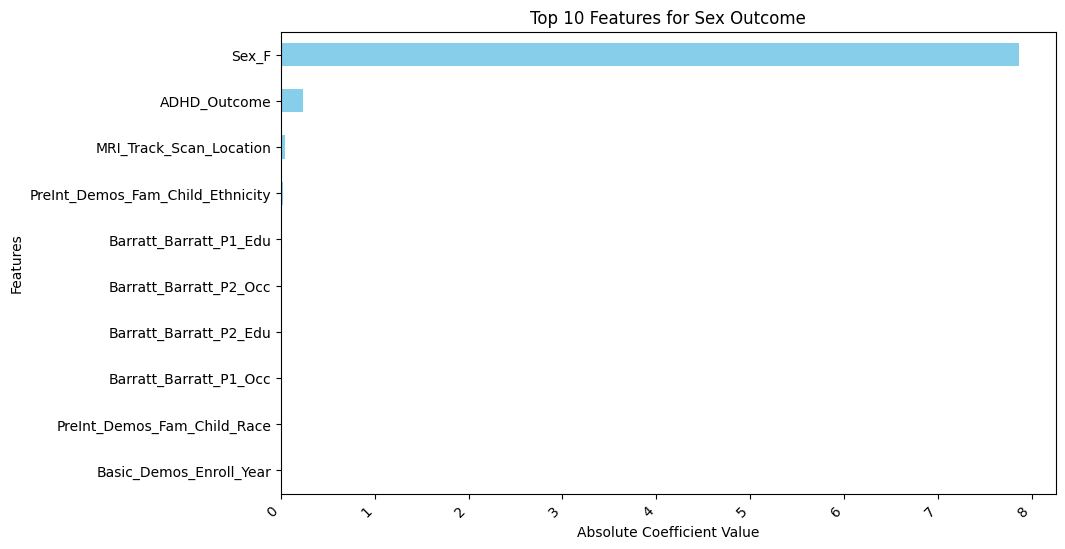

In [ ]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(cat_balanced.drop(columns='participant_id'), cat_balanced['ADHD_Outcome'])

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.Series(model.coef_[0], index=cat_balanced.drop(columns='participant_id').columns)

In [ ]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

ADHD_Outcome                        7.750102
Sex_F                               0.234654
MRI_Track_Scan_Location             0.170716
PreInt_Demos_Fam_Child_Ethnicity    0.134897
PreInt_Demos_Fam_Child_Race         0.017089
Barratt_Barratt_P2_Edu              0.011383
Basic_Demos_Study_Site              0.006761
Barratt_Barratt_P1_Occ              0.003996
Basic_Demos_Enroll_Year             0.001858
Barratt_Barratt_P1_Edu              0.000302
dtype: float64


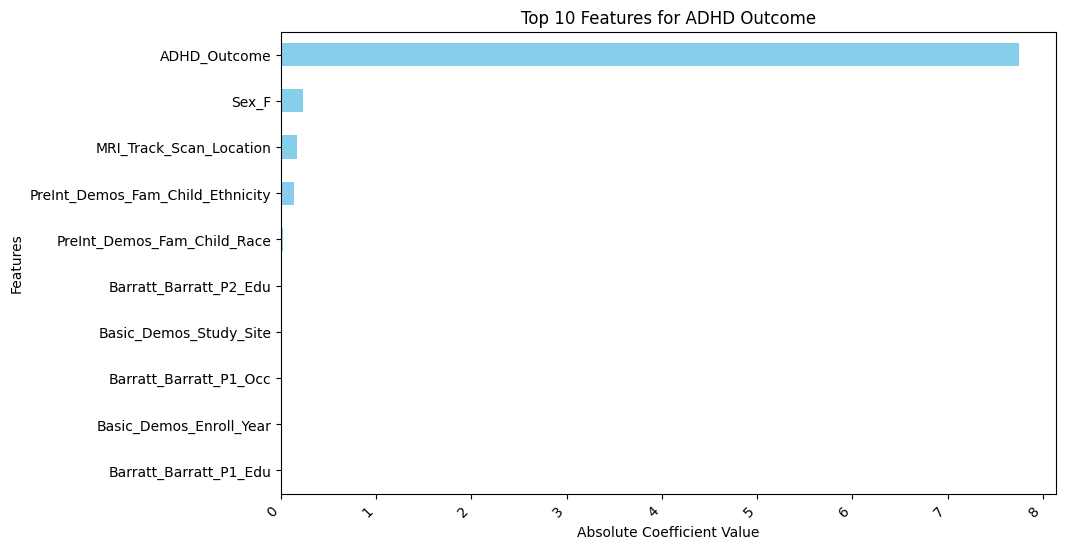

In [ ]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
y = cat_balanced['Sex_F']
X = cat_balanced.drop(columns=['Sex_F', 'participant_id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(557, 10)
(275, 10)


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LogisticRegression()

# 2. Fit the model to the training data below

model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.408031     0.591969
     0.482972     0.517028
     0.481282     0.518718
     0.459054     0.540946
     0.488161     0.511839
Log loss: 0.6951545557512554
Class labels: [1 1 1 1 1]
Accuracy: 0.49818181818181817


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**ADHD outcome**

In [ ]:
y = cat_balanced['ADHD_Outcome']
X = cat_balanced.drop(columns=['ADHD_Outcome', 'participant_id'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(557, 10)
(275, 10)


In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

model = LogisticRegression()

# 2. Fit the model to the training data below

model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.591712     0.408288
     0.151568     0.848432
     0.474579     0.525421
     0.320814     0.679186
     0.252826     0.747174
Log loss: 0.6012900310284395
Class labels: [0 1 1 1 1]
Accuracy: 0.6763636363636364


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Hybrid -> Balance of Both

In [3]:
from imblearn.combine import SMOTETomek

In [4]:
print(train_categorical.shape, train_solutions.shape)

(1213, 10) (1213, 3)


In [5]:
df = pd.merge(train_categorical, train_solutions, on='participant_id')

participant_ids = df['participant_id']

In [6]:
df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1


In [7]:
print(df.isna().sum())

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
ADHD_Outcome                         0
Sex_F                                0
dtype: int64


In [8]:
#fill missing NA values
df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

In [11]:
X = df.drop(columns=['Sex_F', 'participant_id'])
y = df['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smt = SMOTETomek(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)


In [12]:
print(y_train_resampled.value_counts())

Sex_F
0    562
1    562
Name: count, dtype: int64


In [23]:
cat_balanced = pd.DataFrame(X_train_resampled, columns=X.columns)
cat_balanced['Sex_F'] = y_train_resampled

In [24]:
cat_balanced['participant_id'] = participant_ids

In [25]:
cat_balanced.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F,participant_id
0,2019,3,0.0,8,3,18,0,18,45,0,0,UmrK0vMLopoR
1,2016,1,1.0,2,2,15,35,21,0,1,1,CPaeQkhcjg7d
2,2018,3,0.0,1,3,21,45,21,45,1,0,Nb4EetVPm3gs
3,2018,1,0.0,1,3,3,0,0,0,1,1,p4vPhVu91o4b
4,2019,4,0.0,8,3,15,0,21,30,0,0,M09PXs7arQ5E


In [27]:
cat_balanced.to_csv('cat_balanced_hybrid.csv', index=False)

## Models

### Decision Tree

**Sex_F prediction**

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_resampled, dt_classifier.predict(X_train_resampled))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6173
Decision Tree Training Accuracy: 0.6646

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       171
           1       0.34      0.31      0.32        72

    accuracy                           0.62       243
   macro avg       0.53      0.53      0.53       243
weighted avg       0.61      0.62      0.61       243



**ADHD prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']


# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_classifier.fit(X_train_ADHD, y_train_ADHD)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test_ADHD)

# Evaluate the model
accuracy = accuracy_score(y_test_ADHD, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train_ADHD, dt_classifier.predict(X_train_ADHD))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test_ADHD, y_pred))

Decision Tree Accuracy: 0.6749
Decision Tree Training Accuracy: 0.7028

              precision    recall  f1-score   support

           0       0.29      0.15      0.20        65
           1       0.74      0.87      0.80       178

    accuracy                           0.67       243
   macro avg       0.52      0.51      0.50       243
weighted avg       0.62      0.67      0.64       243



### Gradient Boosting Trees

**Sex_F prediction**

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")
print("")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Validation accuracy: 0.6131687242798354

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       171
           1       0.38      0.46      0.41        72

    accuracy                           0.61       243
   macro avg       0.56      0.57      0.56       243
weighted avg       0.64      0.61      0.62       243



###Hybrid + One Hot Encoded GBD Model for Sex_F

In [ ]:
df = pd.read_csv("/content/cat_balanced_hybrid.csv")

In [15]:
X = df.drop(columns=['Sex_F', 'participant_id'])
y = df['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")
print("")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.6954732510288066

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.49      0.41       243
weighted avg       0.49      0.70      0.58       243



**ADHD prediction**

In [ ]:
X_train_ADHD = X_train_resampled.drop(columns=['ADHD_Outcome'])
y_train_ADHD = X_train_resampled['ADHD_Outcome']
x_test_ADHD = X_test.drop(columns=['ADHD_Outcome'])
y_test_ADHD = X_test['ADHD_Outcome']

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_ADHD, y_train_ADHD)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_ADHD)
print(f"Validation accuracy: {accuracy_score(y_test_ADHD, y_pred)}")

print("")
print(classification_report(y_test_ADHD, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Validation accuracy: 0.6378600823045267

              precision    recall  f1-score   support

           0       0.26      0.18      0.21        65
           1       0.73      0.80      0.76       178

    accuracy                           0.64       243
   macro avg       0.49      0.49      0.49       243
weighted avg       0.60      0.64      0.62       243



###Logistic Regression

In [ ]:
cat_balanced = pd.read_csv('cat_balanced_hybrid.csv')

In [ ]:
cat_balanced.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45,ADHD_Outcome_1,Sex_F_1
0,UmrK0vMLopoR,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,CPaeQkhcjg7d,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Nb4EetVPm3gs,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,p4vPhVu91o4b,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,M09PXs7arQ5E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
cat_balanced.isnull().sum()

,0
participant_id,263
PreInt_Demos_Fam_Child_Ethnicity,644
Basic_Demos_Enroll_Year_2016,644
Basic_Demos_Enroll_Year_2017,644
Basic_Demos_Enroll_Year_2018,644
Basic_Demos_Enroll_Year_2019,644
Basic_Demos_Enroll_Year_2020,644
Basic_Demos_Study_Site_2,644
Basic_Demos_Study_Site_3,644
Basic_Demos_Study_Site_4,644


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(cat_balanced.drop(columns='participant_id'), cat_balanced['Sex_F_1'])

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#One Hot Encoding

In [28]:
cat_balanced_hybrid = pd.read_csv("/content/cat_balanced_hybrid.csv")
# cat_balanced_over = pd.read_csv("/content/cat_balanced_over.csv")
# cat_balanced_under = pd.read_csv("/content/cat_balanced_under.csv")

In [29]:
for col in cat_balanced_hybrid.select_dtypes(include='int').columns:
    cat_balanced_hybrid[col] = cat_balanced_hybrid[col].astype('category')

# for col in cat_balanced_over.select_dtypes(include='int').columns:
#     cat_balanced_over[col] = cat_balanced_over[col].astype('category')

# for col in cat_balanced_under.select_dtypes(include='int').columns:
#     cat_balanced_under[col] = cat_balanced_under[col].astype('category')

# for col in train_categorical.select_dtypes(include='int').columns:
#     train_categorical[col] = train_categorical[col].astype('category')

In [31]:
print(cat_balanced_hybrid.dtypes)

Basic_Demos_Enroll_Year             category
Basic_Demos_Study_Site              category
PreInt_Demos_Fam_Child_Ethnicity     float64
PreInt_Demos_Fam_Child_Race         category
MRI_Track_Scan_Location             category
Barratt_Barratt_P1_Edu              category
Barratt_Barratt_P1_Occ              category
Barratt_Barratt_P2_Edu              category
Barratt_Barratt_P2_Occ              category
ADHD_Outcome                        category
Sex_F                               category
participant_id                        object
dtype: object


In [33]:
cat_balanced_hybrid.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F,participant_id
0,2019,3,0.0,8,3,18,0,18,45,0,0,UmrK0vMLopoR
1,2016,1,1.0,2,2,15,35,21,0,1,1,CPaeQkhcjg7d
2,2018,3,0.0,1,3,21,45,21,45,1,0,Nb4EetVPm3gs
3,2018,1,0.0,1,3,3,0,0,0,1,1,p4vPhVu91o4b
4,2019,4,0.0,8,3,15,0,21,30,0,0,M09PXs7arQ5E


In [ ]:
train_categorical.head()

,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Race_1,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,0.0,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1.0,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.0,False,False,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# Creating a list of all of the columns except the first
columns_to_encode = cat_balanced_hybrid.columns.tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F', 'participant_id']


In [35]:
# encoding categorical data
# train_encoded = pd.get_dummies(cat_balanced_under[columns_to_encode[:-1]], drop_first=True)
# train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# train_encoded1 = pd.get_dummies(cat_balanced_over[columns_to_encode[:-1]], drop_first=True)
# train_encoded1 = train_encoded1.applymap(lambda x: 1 if x is True else (0 if x is False else x))

train_encoded2 = pd.get_dummies(cat_balanced_hybrid[columns_to_encode[:-1]], drop_first=True)
train_encoded2 = train_encoded2.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-35-aa054e22d1e3>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded2 = train_encoded2.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [37]:
# Combine encoded columns with the rest of the DataFrame
# cat_train_final = pd.concat([cat_balanced_under.drop(columns=columns_to_encode[:-1]), train_encoded], axis=1)
# cat_train_final1 = pd.concat([cat_balanced_over.drop(columns=columns_to_encode[:-1]), train_encoded1], axis=1)
cat_train_final2 = pd.concat([cat_balanced_hybrid.drop(columns=columns_to_encode[:-1]), train_encoded2], axis=1)

# ensure it looks correct
# print(cat_train_final.head())
# print(cat_train_final1.head())
print(cat_train_final2.head())

  participant_id  PreInt_Demos_Fam_Child_Ethnicity  \
0   UmrK0vMLopoR                               0.0   
1   CPaeQkhcjg7d                               1.0   
2   Nb4EetVPm3gs                               0.0   
3   p4vPhVu91o4b                               0.0   
4   M09PXs7arQ5E                               0.0   

   Basic_Demos_Enroll_Year_2016  Basic_Demos_Enroll_Year_2017  \
0                             0                             0   
1                             1                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Basic_Demos_Enroll_Year_2018  Basic_Demos_Enroll_Year_2019  \
0                             0                             1   
1                             0                             0   
2                             1                             0   
3                       

In [38]:
cat_train_final2.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Occ_36,Barratt_Barratt_P2_Occ_39,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_41,Barratt_Barratt_P2_Occ_42,Barratt_Barratt_P2_Occ_43,Barratt_Barratt_P2_Occ_44,Barratt_Barratt_P2_Occ_45,ADHD_Outcome_1,Sex_F_1
0,UmrK0vMLopoR,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,CPaeQkhcjg7d,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,Nb4EetVPm3gs,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cat_train_final.to_csv('cat_balanced_under.csv', index=False)

In [ ]:
cat_train_final1.to_csv('cat_balanced_over.csv', index=False)

In [39]:
cat_train_final2.to_csv('cat_balanced_hybrid.csv', index=False)

# Best results:

**Oversampling best results:**
- Gradient Boosting Trees→ predicting Sex_F **acc_score = 0.62 and F1 = 0.72 and 0.43**
- Gradient Boosting Trees→ predicting ADHD **acc_score = 0.63 amd F1 = 0.24 and 0.76**
- Logistic Regression Feature Selection found:
  - Sex_F most correlated with study site
  - ADHD_Outcome with enroll year.
- Logistic Regression -> predicting Sex_F **acc_score = 0.66** **log_loss = 0.59**
- Logistic Regression -> predicting ADHD **acc_score = 0.65** **log_loss = 0.64**

**Undersampling results:**
- Decision Tree→ predicting Sex_F **acc_score = 0.60 and F1 = 0.71 and 0.36**
- Gradient Boosting Trees→ predicting ADHD **acc_score = 0.73 and F1 = 0.27 and 0.84**
- Logistic Regression Feature Selection found:
  - most correlated with MRI Track Scan Location and Ethnicity
- Logistic Regression -> predicting Sex_F **acc_score = 0.50** **log_loss = 0.70**
- Logistic Regression -> predicting ADHD **acc_score = 0.67** **log_loss = 0.60**

**Hybrid results:**
- Gradient Boosting Trees→ predicting Sex_F **acc_score = 0.61 and F1 = 0.71 nad 0.41**
  - Not much changed with one hot encoded data
- Decision Tree→ predicting ADHD **acc_score = 0.67 and F1 = 0.2 and 0.8** (not dropping
 Sex_F in X)


*Best models*
- For Sex_F --> oversampling gradient boosting trees with acc_score = 0.62 and F1 = 0.72 and 0.43
- For ADHD --> undersampling gradient boosting trees with acc_score = 0.73 and F1 = 0.27 and 0.84


#####Preparing to Submit(One-Hot Encoded Hybrid GBT for Sex_F and One-Hot Encoded Over GBT for ADHD)

In [55]:
test_categorical = pd.read_excel('/content/TEST_CATEGORICAL.xlsx')

In [57]:
test_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [58]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [43]:
test_categorical.shape

(304, 10)

In [44]:
test_categorical.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,1
Barratt_Barratt_P1_Occ,1
Barratt_Barratt_P2_Edu,36
Barratt_Barratt_P2_Occ,42


In [45]:
test_categorical.columns.isna().sum()

0

In [46]:
#fill missing NA values
test_categorical.fillna({'PreInt_Demos_Fam_Child_Ethnicity':test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

In [47]:
test_categorical.fillna({'PreInt_Demos_Fam_Child_Race':test_categorical['PreInt_Demos_Fam_Child_Race'].mean()}, inplace = True)

In [48]:
test_categorical.fillna({'Barratt_Barratt_P1_Edu':test_categorical['Barratt_Barratt_P1_Edu'].mean()}, inplace = True)

In [49]:
test_categorical.fillna({'Barratt_Barratt_P1_Occ':test_categorical['Barratt_Barratt_P1_Occ'].mean()}, inplace = True)

In [50]:
test_categorical.fillna({'Barratt_Barratt_P2_Edu':test_categorical['Barratt_Barratt_P2_Edu'].mean()}, inplace = True)

In [51]:
test_categorical.fillna({'Barratt_Barratt_P2_Occ':test_categorical['Barratt_Barratt_P2_Occ'].mean()}, inplace = True)

In [56]:
test_categorical.isna().sum()

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,3
PreInt_Demos_Fam_Child_Race,6
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,1
Barratt_Barratt_P1_Occ,1
Barratt_Barratt_P2_Edu,36
Barratt_Barratt_P2_Occ,42


One Hot Encoded Hybrid for Sex_F (do training from above)

One hot encoding on test

In [53]:
for col in test_categorical.select_dtypes(include='int').columns:
    test_categorical[col] = test_categorical[col].astype('category')

In [54]:
print(test_categorical.dtypes)

participant_id                        object
Basic_Demos_Enroll_Year             category
Basic_Demos_Study_Site              category
PreInt_Demos_Fam_Child_Ethnicity     float64
PreInt_Demos_Fam_Child_Race          float64
MRI_Track_Scan_Location             category
Barratt_Barratt_P1_Edu               float64
Barratt_Barratt_P1_Occ               float64
Barratt_Barratt_P2_Edu               float64
Barratt_Barratt_P2_Occ               float64
dtype: object


In [ ]:
# Creating a list of all of the columns except the first
columns_to_encode = test_categorical.columns.tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
# encoding categorical data
test_encoded = pd.get_dummies(test_categorical[columns_to_encode[1:]], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-89-53b4c6e7dc2e>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_categorical.drop(columns=columns_to_encode[1:]), test_encoded], axis=1)

# ensure it looks correct
cat_test_final.head()

,participant_id,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,PreInt_Demos_Fam_Child_Race_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,Cfwaf5FX7jWK,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,vhGrzmvA3Hjq,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ULliyEXjy4OV,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,LZfeAb1xMtql,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,EnFOUv0YK1RG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
sex_f_predictions = best_model.predict(cat_test_final.drop(columns='participant_id'))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Barratt_Barratt_P1_Edu_12.0
- Barratt_Barratt_P1_Edu_15.0
- Barratt_Barratt_P1_Edu_18.0
- Barratt_Barratt_P1_Edu_21.0
- Barratt_Barratt_P1_Edu_6.0
- ...
Feature names seen at fit time, yet now missing:
- ADHD_Outcome_1
- Barratt_Barratt_P1_Edu_1
- Barratt_Barratt_P1_Edu_10
- Barratt_Barratt_P1_Edu_11
- Barratt_Barratt_P1_Edu_12
- ...


## Trying one hot encoding (two ways) and not sampling to see performance

In [ ]:
train_categorical = pd.read_excel("/content/TRAIN_CATEGORICAL_METADATA.xlsx")
train_solutions = pd.read_excel("/content/TRAINING_SOLUTIONS.xlsx")

In [ ]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis=0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,11
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [ ]:
#fill missing NA values wiht 3 because 3 = unknown
train_categorical.fillna({'PreInt_Demos_Fam_Child_Ethnicity':3}, inplace = True)

In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis=0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [ ]:
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'] = train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].astype('int')

In [ ]:
for col in train_categorical.select_dtypes(include='int').columns:
    train_categorical[col] = train_categorical[col].astype('category')

In [ ]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
train_categorical.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,category
Basic_Demos_Study_Site,category
PreInt_Demos_Fam_Child_Ethnicity,category
PreInt_Demos_Fam_Child_Race,category
MRI_Track_Scan_Location,category
Barratt_Barratt_P1_Edu,category
Barratt_Barratt_P1_Occ,category
Barratt_Barratt_P2_Edu,category
Barratt_Barratt_P2_Occ,category


In [ ]:
df_train = pd.merge(train_categorical, train_solutions, on='participant_id')
participant_ids = df_train['participant_id']

In [ ]:
df_train.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,category
Basic_Demos_Study_Site,category
PreInt_Demos_Fam_Child_Ethnicity,category
PreInt_Demos_Fam_Child_Race,category
MRI_Track_Scan_Location,category
Barratt_Barratt_P1_Edu,category
Barratt_Barratt_P1_Occ,category
Barratt_Barratt_P2_Edu,category
Barratt_Barratt_P2_Occ,category


In [ ]:
df_train = df_train.drop(columns=['participant_id'])

Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Sex_F Prediction

In [ ]:
X = df_train.drop(columns=['Sex_F', 'ADHD_Outcome'])
y = df_train['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=12, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6049
Decision Tree Training Accuracy: 0.8969

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       171
           1       0.34      0.36      0.35        72

    accuracy                           0.60       243
   macro avg       0.53      0.53      0.53       243
weighted avg       0.61      0.60      0.61       243



Gradient Boosting Classifier

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")

print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.50      0.41       243
weighted avg       0.50      0.70      0.58       243



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


trial with follwing the workshop

In [ ]:
train_categorical = pd.read_excel("/content/TRAIN_CATEGORICAL_METADATA.xlsx")
train_solutions = pd.read_excel("/content/TRAINING_SOLUTIONS.xlsx")

In [ ]:
#fill missing NA values wiht 3 because 3 = unknown
train_categorical.fillna({'PreInt_Demos_Fam_Child_Ethnicity':3}, inplace = True)

In [ ]:
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'] = train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].astype('int')

In [ ]:
for col in train_categorical.select_dtypes(include='int').columns:
    train_categorical[col] = train_categorical[col].astype('category')

# Creating a list of all of the columns except the first
columns_to_encode = train_categorical.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

# encoding categorical data
train_encoded = pd.get_dummies(train_categorical[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_categorical.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


<ipython-input-112-50c0c4550305>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train = pd.merge(train_categorical, train_solutions, on='participant_id')
participant_ids = df_train['participant_id']

In [ ]:
df_train = df_train.drop(columns=['participant_id'])

In [ ]:
X = df_train.drop(columns=['Sex_F', 'ADHD_Outcome'])
y = df_train['Sex_F']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=12, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6049
Decision Tree Training Accuracy: 0.8969

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       171
           1       0.34      0.36      0.35        72

    accuracy                           0.60       243
   macro avg       0.53      0.53      0.53       243
weighted avg       0.61      0.60      0.61       243



In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")

print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.70      1.00      0.83       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.50      0.41       243
weighted avg       0.50      0.70      0.58       243



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ADHD Prediction

In [ ]:
X = df_train.drop(columns=['Sex_F', 'ADHD_Outcome'])
y = df_train['ADHD_Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7119
Decision Tree Training Accuracy: 0.7309

              precision    recall  f1-score   support

           0       0.44      0.26      0.33        65
           1       0.76      0.88      0.82       178

    accuracy                           0.71       243
   macro avg       0.60      0.57      0.57       243
weighted avg       0.68      0.71      0.69       243



In [ ]:
#Dropping more features to see if that improves performance
X = df_train.drop(columns=['Sex_F', 'ADHD_Outcome', 'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location'])
y = df_train['ADHD_Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

#Training data evaluation
train_accurac = accuracy_score(y_train, dt_classifier.predict(X_train))
print(f'Decision Tree Training Accuracy: {train_accurac:.4f}')

print("")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7119
Decision Tree Training Accuracy: 0.7268

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        65
           1       0.76      0.89      0.82       178

    accuracy                           0.71       243
   macro avg       0.59      0.56      0.56       243
weighted avg       0.67      0.71      0.68       243



In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42) # Added random_state for reproducibility

# Make paramter grid of values to test each model on
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Eval mbest model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Validation accuracy: {accuracy_score(y_test, y_pred)}")

print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.7366255144032922
              precision    recall  f1-score   support

           0       0.55      0.09      0.16        65
           1       0.75      0.97      0.84       178

    accuracy                           0.74       243
   macro avg       0.65      0.53      0.50       243
weighted avg       0.69      0.74      0.66       243

